**ShopEasy Project**

Imagine a platform named ShopEasy, a leading e-commerce site that sells a variety of products, from
books and gadgets to furniture and fashion. Over the years, they have amassed a vast amount of user
data. This data is a gold mine of insights waiting to be discovered. ShopEasy aims to provide
personalized user experiences, special promotions, and improved services. But to do this effectively,
they first need to understand the buying habits and behaviors of their customers. By applying
segmentation to this dataset, ShopEasy aims to uncover these hidden patterns and provide an
enhanced, personalized shopping experience for its users.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
shopeasy_data = pd.read_csv('/Users/janstein/Documents/DEV/ML_Project/shopEasy.csv')
shopeasy_data.head()

personId  accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   C10573   1034.660626        0.833333    1308.11          1308.11   
1   C16889    777.853474        0.666667       0.00             0.00   
2   C12964     97.453056        0.818182     334.73           334.73   
3   C11171      0.000000        0.000000      12.65             0.00   
4   C17582     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  ...  emergencyCount  \
0                0.500000                  0.000000  ...               1   
1                0.000000                  0.000000  ...               8   
2                0.083333                  0.000000  ...               1   
3                0.000000                  0.083333  ...               0   
4                0.166667                  0.000000  ...               0   

   itemCount  maxSpendLimit  monthlyPaid  leastAmountPaid  \
0          8         1500.0   236.764555       207.007715   
1          0         2000.0    89.741508       173.276205   
2          1         2500.0   234.271939       117.297542   
3          1         5000.0     0.000000              NaN   
4          1         1500.0   118.438703        54.138711   

   paymentCompletionRate  accountLifespan     location accountType webUsage  
0                   0.00                6     New York     Premium       60  
1                   0.00                6  Los Angeles     Premium        5  
2                   0.25               12     New York     Student       21  
3                   0.00               12      Chicago     Premium       53  
4                   0.00                6     New York     Premium       59  

[5 rows x 21 columns]

**Description of the Dataset**

- **personId**: Unique identifier for each user on the platform

- **accountTotal**: Total amount spent by the user on ShopEasy since their registration

- **frequencyIndex**: Reflects how frequently the user shops, with 1 being very frequent and values less than 1 being less frequent
- **itemCosts**: Total costs of items purchased by the user
- **singleItemCosts**: Costs of items that the user bought in a single purchase without opting for installments
- **multipleItemCosts**: Costs of items that the user decided to buy in installments
- **emergencyFunds**: Amount that the user decided to keep as a backup in their ShopEasy wallet for faster checkout or emergency purchases
- **itemBuyFrequency**: Frequency with which the user makes purchases
- **singleItemBuyFrequency**: How often the user makes single purchases without opting for installments
- **multipleItemBuyFrequency**: How often the user opts for installment-based purchases
- **emergencyUseFrequency**: How frequently the user taps into their emergency funds
- **emergencyCount**: Number of times the user has used their emergency funds
- **itemCount**: Total number of individual items purchased by the user
- **maxSpendLimit**: The maximum amount the user can spend in a single purchase, set by ShopEasy based on user's buying behavior and loyalty
- **monthlyPaid**: Total amount paid by the user every month
- **leastAmountPaid**: The least amount paid by the user in a single transaction
- **paymentCompletionRate**: Percentage of purchases where the user has paid the full amount
- **accountLifespan**: Duration for which the user has been registered on ShopEasy
- **location**: User's city or region
- **accountType**: The type of account held by the user. Regular for most users, Premium for those who have subscribed to ShopEasy premium services, and Student for users who have registered with a student ID
- **webUsage**: A metric (0-100) indicating the frequency with which the user shops on ShopEasy via web browsers. A higher number indicates more frequent web usage

### Scope

For this assignment we're interested in investigating the relationship between the amount of money spent and the volume of products purchased, to better understand if customers are high/low value customers because of the cost of items purchased, or because of the amount of (cheap?) items purchased.

Therefore, and because of the size of the dataset, we have chosen to eliminate variables that are not relevant for this investigation.

### Columns to be cut

1. **paymentCompletionRate:** because it is a payment option related variable
2. **maxSpendLimit:** because it is already represented through spending, which is represented in monthly paid
3. **emergencyCount:** because it just reflects the customers preferred payment option, which is irrelevant for this investigation
4. **emergencyUseFrequency:** because of the same reason
5. **emergencyFunds:** because of the same reason
6. **singleItemCosts:** because they are only related to payment option
7. **MultipleItemCosts:** because they are only related to payment option
8. **singleItemBuyFrequency:** because they are only related to payment option
9. **multipleItemBuyFrequency:** because they are only related to payment option
10. **personId:** This variable is just an internal customer ID and does not matter for our purposes



In [4]:
drop_columns = ['paymentCompletionRate', 'maxSpendLimit', 'emergencyCount', 'emergencyUseFrequency', 'emergencyFunds', 'singleItemCosts', 'multipleItemCosts', 'singleItemBuyFrequency', 'multipleItemBuyFrequency', 'personId']

shopeasy_data_dropped = shopeasy_data.drop(drop_columns, axis=1)

shopeasy_data_dropped.head()

accountTotal  frequencyIndex  itemCosts  itemBuyFrequency  itemCount  \
0   1034.660626        0.833333    1308.11          0.500000          8   
1    777.853474        0.666667       0.00          0.000000          0   
2     97.453056        0.818182     334.73          0.083333          1   
3      0.000000        0.000000      12.65          0.083333          1   
4     18.120946        0.500000      57.00          0.166667          1   

   monthlyPaid  leastAmountPaid  accountLifespan     location accountType  \
0   236.764555       207.007715                6     New York     Premium   
1    89.741508       173.276205                6  Los Angeles     Premium   
2   234.271939       117.297542               12     New York     Student   
3     0.000000              NaN               12      Chicago     Premium   
4   118.438703        54.138711                6     New York     Premium   

   webUsage  
0        60  
1         5  
2        21  
3        53  
4        59

### Descriptive Statistics
Descriptive statistics will give us an insight into the central tendency, dispersion, and shape of the dataset's distribution.

In [5]:
# Descriptive statistics for the dataset
shopeasy_data_dropped.describe().T

count         mean          std       min         25%  \
accountTotal      8950.0  1564.474828  2081.531879  0.000000  128.281915   
frequencyIndex    8950.0     0.877271     0.236904  0.000000    0.888889   
itemCosts         8950.0  1003.204834  2136.634782  0.000000   39.635000   
itemBuyFrequency  8950.0     0.490351     0.401371  0.000000    0.083333   
itemCount         8950.0    14.709832    24.857649  0.000000    1.000000   
monthlyPaid       8950.0  1733.143852  2895.063757  0.000000  383.276166   
leastAmountPaid   8637.0   864.206542  2372.446607  0.019163  169.123707   
accountLifespan   8950.0    11.517318     1.338331  6.000000   12.000000   
webUsage          8950.0    49.422570    28.808219  0.000000   24.000000   

                         50%          75%          max  
accountTotal      873.385231  2054.140036  19043.13856  
frequencyIndex      1.000000     1.000000      1.00000  
itemCosts         361.280000  1110.130000  49039.57000  
itemBuyFrequency    0.500000     0.916667      1.00000  
itemCount           7.000000    17.000000    358.00000  
monthlyPaid       856.901546  1901.134317  50721.48336  
leastAmountPaid   312.343947   825.485459  76406.20752  
accountLifespan    12.000000    12.000000     12.00000  
webUsage           49.000000    74.000000     99.00000

### Strange min values

**Some columns contain the value 0 in places that should disqualify them from our dataset. These are:**
- **accountTotal:** because this would mean they have not spent any money
- **itemCosts:** because this would mean they have not purchased any items
- **itemCount:** because this would mean they have not purchased any items
- **monthlyPaid:** because this would mean they have not spent any money

These are likely either customers who have never bough anything, or some sort of replacement for missing values. Either way, they should not be in our dataset.


In [6]:
columns_to_check = ['accountTotal', 'itemCosts', 'itemCount', 'monthlyPaid']

# Counting zeros in each specified column
zero_counts = {col: (shopeasy_data_dropped[col] == 0).sum() for col in columns_to_check}

print(zero_counts)

# Creating a combined mask for rows with zeros in our specified columns
combined_mask = (shopeasy_data_dropped[columns_to_check] == 0).any(axis=1)

# Counting the number of rows that have zeros in any of our specified columns
count_of_rows_with_zeros = combined_mask.sum()

print(f"Number of rows with at least one zero in the specified columns: {count_of_rows_with_zeros}")

{'accountTotal': 80, 'itemCosts': 2044, 'itemCount': 2044, 'monthlyPaid': 240}
Number of rows with at least one zero in the specified columns: 2258


**Since these values are from customers who have not made purchases they are not relevant for our investigation. We have therefore chosen to remove them**

In [7]:
# Creating a boolean mask for rows with zeros in any of our columns
mask = (shopeasy_data_dropped[columns_to_check] == 0).any(axis=1)

# Dropping rows where any of the specified columns have a zero
shopeasy_data_cleaned = shopeasy_data_dropped[~mask]

shopeasy_data_cleaned.describe().T

count         mean          std       min         25%  \
accountTotal      6692.0  1416.932266  2051.301368  0.000199   94.109595   
frequencyIndex    6692.0     0.890648     0.213067  0.090909    0.909091   
itemCosts         6692.0  1324.745744  2379.912658  0.010000  250.690000   
itemBuyFrequency  6692.0     0.641771     0.338751  0.083333    0.333333   
itemCount         6692.0    19.423042    27.072262  1.000000    5.000000   
monthlyPaid       6692.0  1802.664865  2953.545784  0.056466  424.771307   
leastAmountPaid   6660.0   823.218847  2295.170667  0.019163  162.248363   
accountLifespan   6692.0    11.584130     1.249100  6.000000   12.000000   
webUsage          6692.0    49.315750    28.800915  0.000000   24.000000   

                         50%          75%          max  
accountTotal      645.116715  1817.267282  19043.13856  
frequencyIndex      1.000000     1.000000      1.00000  
itemCosts         612.165000  1497.355000  49039.57000  
itemBuyFrequency    0.727273     1.000000      1.00000  
itemCount          12.000000    23.000000    358.00000  
monthlyPaid       929.523895  2002.639778  50721.48336  
leastAmountPaid   247.181815   763.169012  76406.20752  
accountLifespan    12.000000    12.000000     12.00000  
webUsage           50.000000    74.000000     99.00000

#### The info() Method
The info() method is used to get a concise summary of the DataFrame. This method is useful for quickly understanding the structure of the dataset, including the following aspects:

- ***Index Range*** Shows the range of the index and the total number of entries in the DataFrame.
- ***Column Names*** Lists all column names in the DataFrame.
- ***Non-Null Counts*** Indicates the number of non-missing (non-null) values for each column. This is crucial for identifying columns with missing data.
- ***Data Types*** Shows the data type of each column (e.g., integer, float, object (string), bool, etc.).
- ***Memory Usage*** Provides information on the memory usage of the DataFrame, which can be important for processing large datasets.

Using info(), you can quickly assess which columns may require type conversion or additional preprocessing due to null values or incorrect data types.

In [8]:
# Using info() to get the dataset summary
shopeasy_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6692 entries, 0 to 8949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accountTotal      6692 non-null   float64
 1   frequencyIndex    6692 non-null   float64
 2   itemCosts         6692 non-null   float64
 3   itemBuyFrequency  6692 non-null   float64
 4   itemCount         6692 non-null   int64  
 5   monthlyPaid       6692 non-null   float64
 6   leastAmountPaid   6660 non-null   float64
 7   accountLifespan   6692 non-null   int64  
 8   location          6692 non-null   object 
 9   accountType       6692 non-null   object 
 10  webUsage          6692 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 627.4+ KB


#### The isnull().sum() Method
The isnull().sum() method is a two-step operation specifically geared towards identifying missing values in the DataFrame:

- ***isnull()*** This part of the method checks each cell in the DataFrame and returns a DataFrame of the same size with boolean values: True if the original cell is null (or NaN), and False otherwise.
- ***sum()*** This part sums up the number of True values (null values) for each column, giving you a total count of missing values in each column.

This method is particularly useful for data cleaning and preprocessing, as handling missing values is a critical step in preparing data for analysis or modeling.

In [9]:
# Using isnull().sum() to count missing values in each column
shopeasy_data_cleaned.isnull().sum()

accountTotal         0
frequencyIndex       0
itemCosts            0
itemBuyFrequency     0
itemCount            0
monthlyPaid          0
leastAmountPaid     32
accountLifespan      0
location             0
accountType          0
webUsage             0
dtype: int64

**There are a few missing values in leastAmountPaid. We have therefore decided to drop these rows.**

In [10]:
df = shopeasy_data_cleaned.dropna(subset=['leastAmountPaid'])

df.isna().sum()

accountTotal        0
frequencyIndex      0
itemCosts           0
itemBuyFrequency    0
itemCount           0
monthlyPaid         0
leastAmountPaid     0
accountLifespan     0
location            0
accountType         0
webUsage            0
dtype: int64

## Feature Engineering

The dataset includes variables for total amount of money spent (accountTotal), total amount of items purchased (itemCount), total cost of those items (itemCosts) and an average monthly spending variable (monthlyPaid). It does however not include a variable for the average item cost.

We add a variable for average item cost (**avgItemCost**) by dividing the itemCosts by itemCount

In [11]:
df['avgItemCost'] = df['itemCosts'] / df['itemCount']

df.describe().T

/var/folders/fm/ybz48djs4wvgqr5vc1m27t3w0000gn/T/ipykernel_1361/1739923190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgItemCost'] = df['itemCosts'] / df['itemCount']


count         mean          std       min         25%  \
accountTotal      6660.0  1423.688363  2053.900836  0.000199   96.054026   
frequencyIndex    6660.0     0.893484     0.208525  0.090909    0.909091   
itemCosts         6660.0  1328.882601  2384.573169  0.010000  251.470000   
itemBuyFrequency  6660.0     0.642498     0.338338  0.083333    0.333333   
itemCount         6660.0    19.487688    27.118690  1.000000    5.000000   
monthlyPaid       6660.0  1802.277373  2938.241746  0.056466  426.220917   
leastAmountPaid   6660.0   823.218847  2295.170667  0.019163  162.248363   
accountLifespan   6660.0    11.585435     1.246854  6.000000   12.000000   
webUsage          6660.0    49.301502    28.817858  0.000000   24.000000   
avgItemCost       6660.0    93.799277   165.472480  0.010000   33.220000   

                         50%          75%           max  
accountTotal      656.505045  1820.422544  19043.138560  
frequencyIndex      1.000000     1.000000      1.000000  
itemCosts         616.335000  1500.000000  49039.570000  
itemBuyFrequency    0.727273     1.000000      1.000000  
itemCount          12.000000    23.000000    358.000000  
monthlyPaid       934.302207  2007.325216  50721.483360  
leastAmountPaid   247.181815   763.169012  76406.207520  
accountLifespan    12.000000    12.000000     12.000000  
webUsage           50.000000    74.000000     99.000000  
avgItemCost        55.523469    94.550107   5981.666667

## Analyzing Outliers

#### Numerical Variables

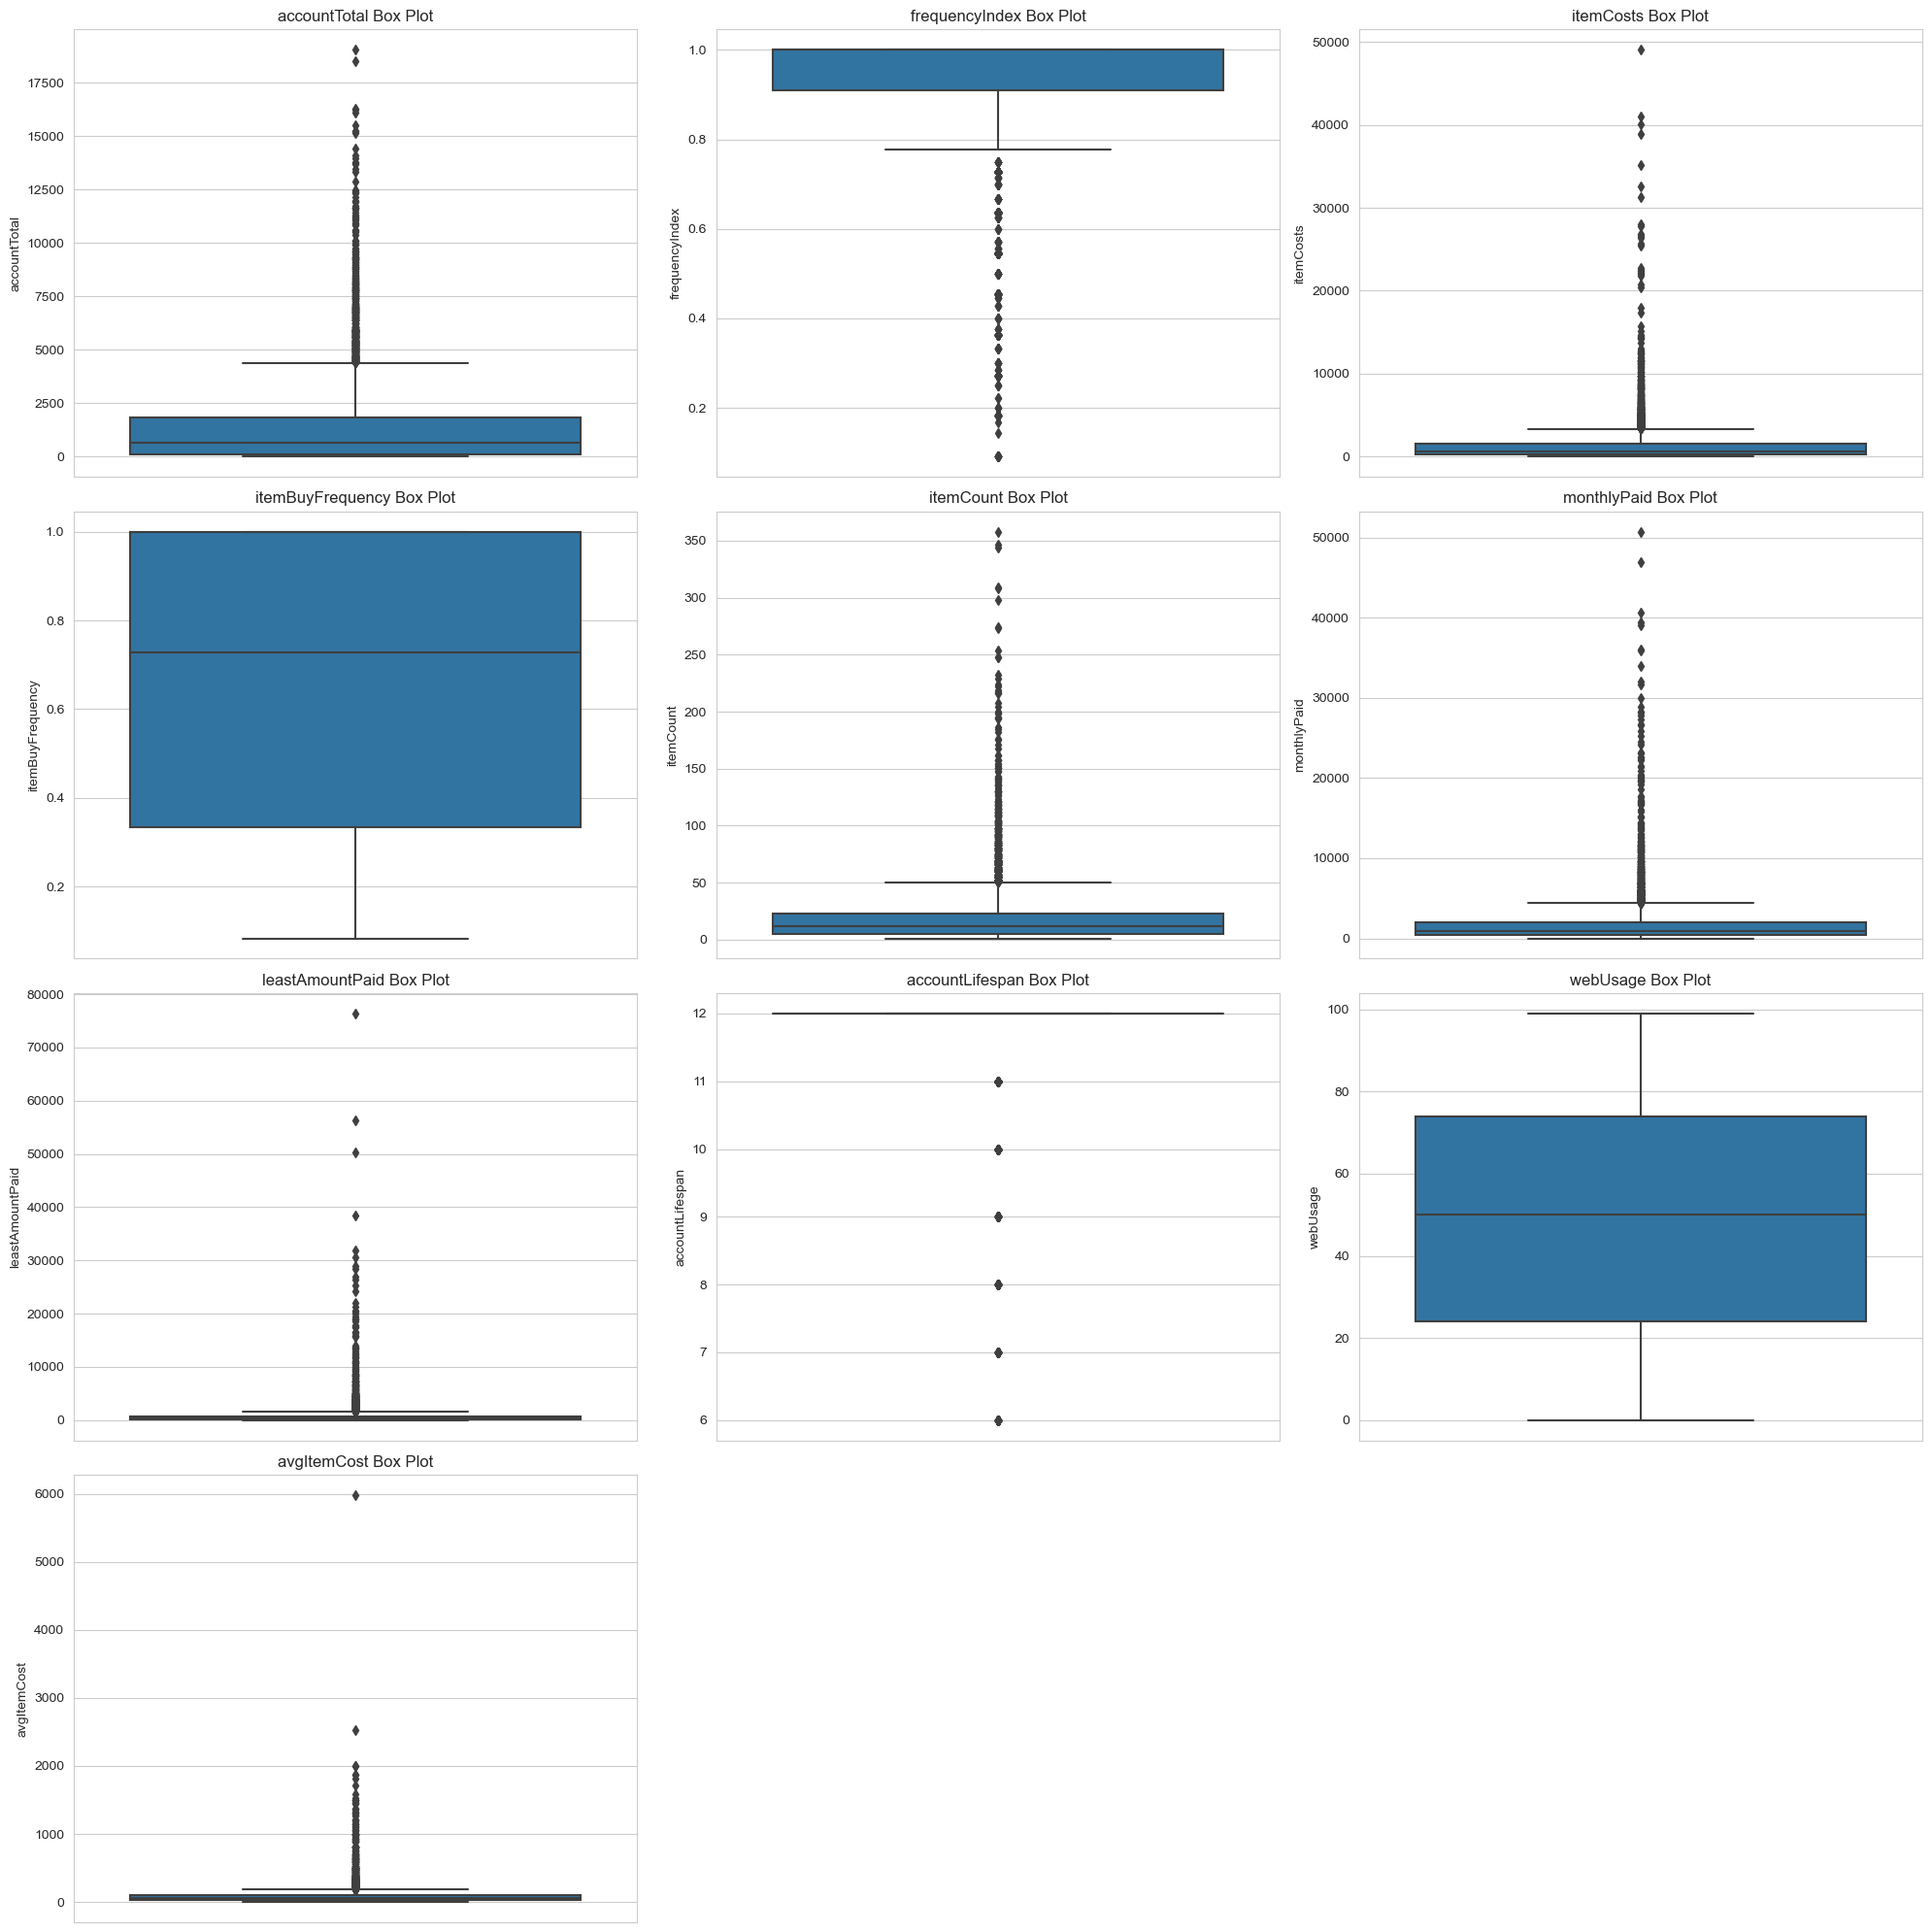

In [12]:
# Filter out only numerical columns for plotting
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Ceil division

# Setting up the figure
plt.figure(figsize=(20, n_rows * 5))  # Adjust size as needed

# Loop through the numerical columns and create a subplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} Box Plot")

plt.tight_layout()
plt.show()

#### Analysis of Categorical Variables

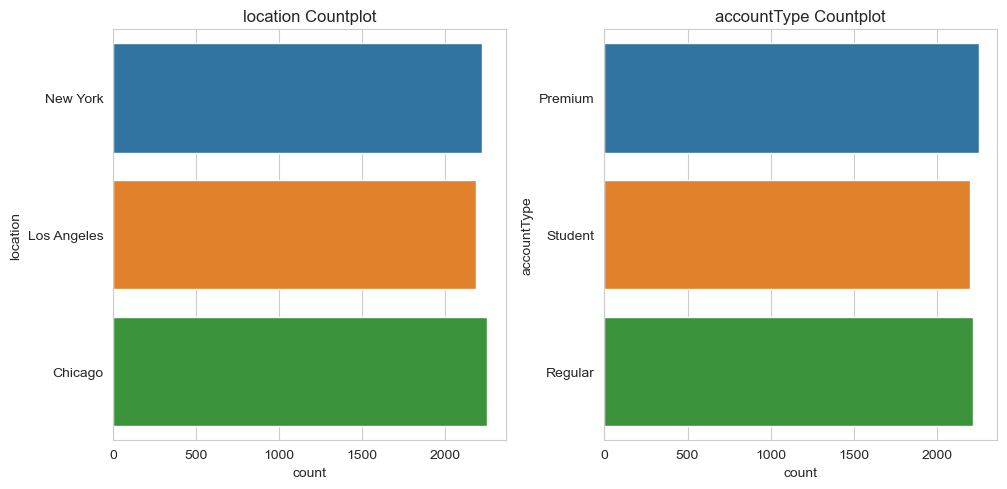

In [13]:
# Filter out only categorical columns for plotting

categorical_cols = df.select_dtypes(include=['object']).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 4  # You can adjust this based on your preference
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ceil division

# Setting up the figure
plt.figure(figsize=(20, n_rows * 5))  # Adjust size as needed

# Loop through the categorical columns and create a subplot for each
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df[col])
    plt.title(f"{col} Countplot")

plt.tight_layout()
plt.show()


## Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words, your data has only one variable. It doesn’t deal with causes or relationships and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

### Analysis of Numerical Features
Let's analyze the numerical features

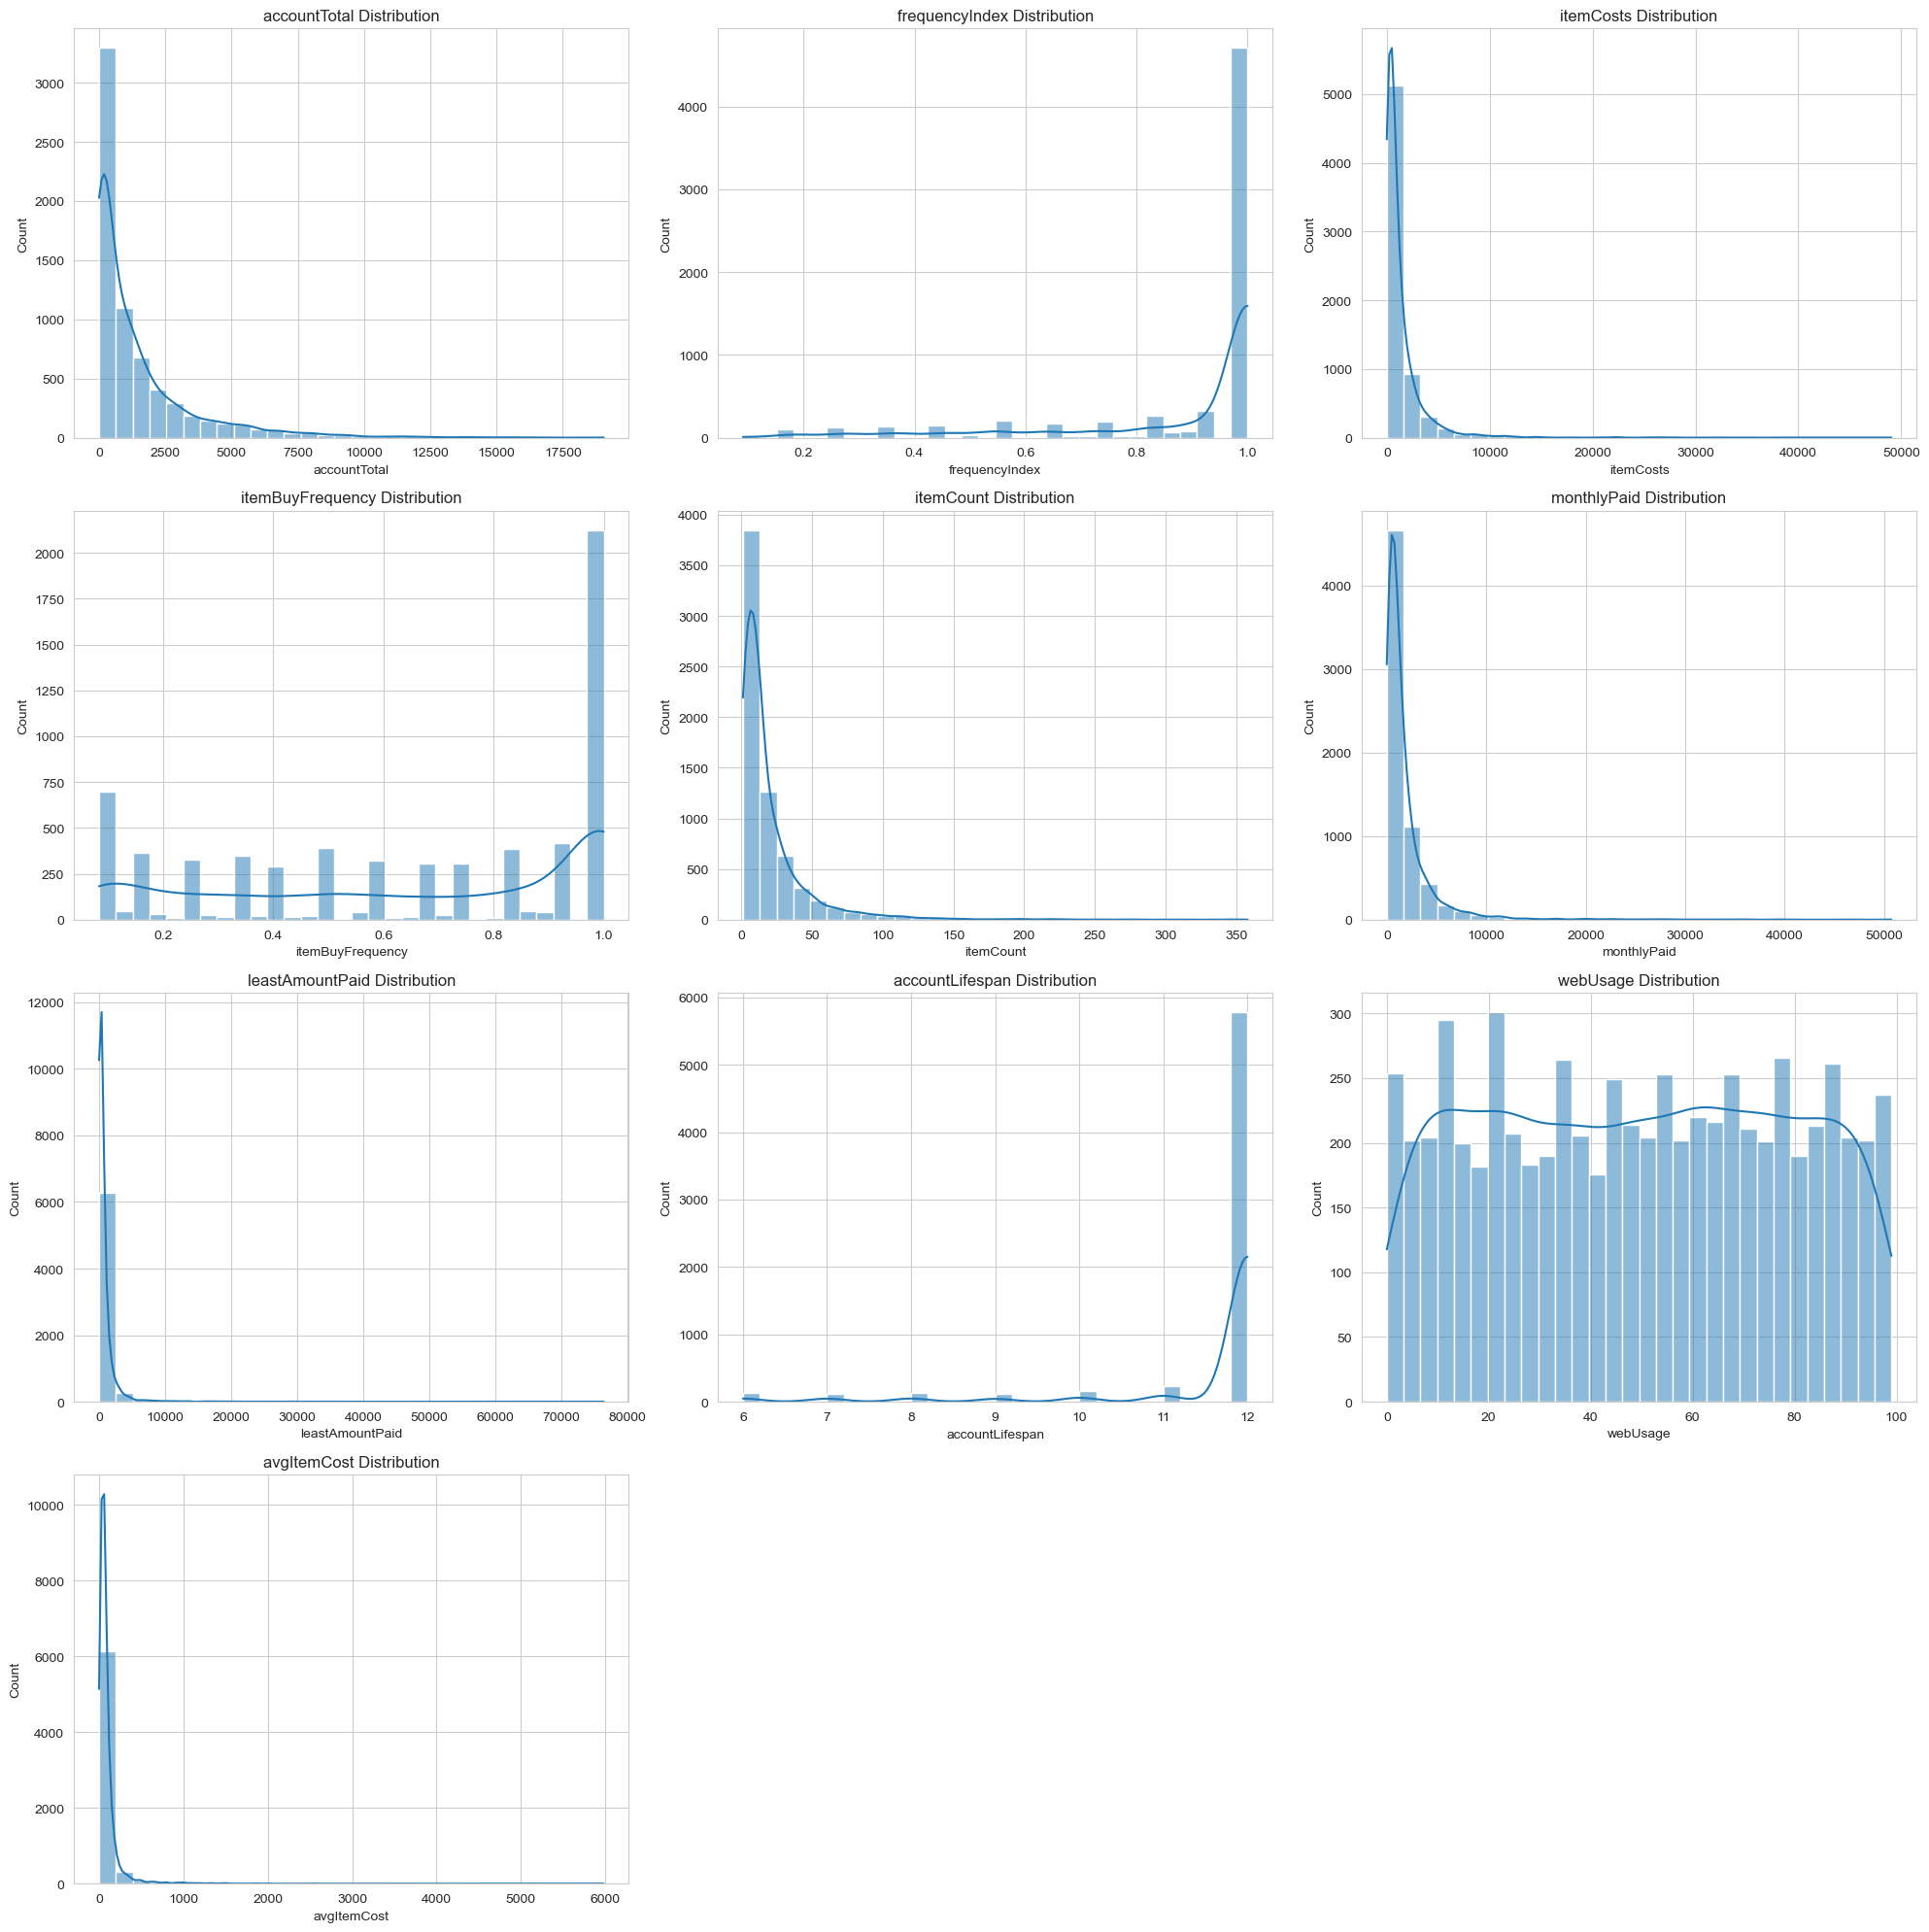

In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Ceil division

# Setting up the figure
plt.figure(figsize=(20, n_rows * 5))  # Adjust size as needed

# Loop through the numerical columns and create a subplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

### Some evaluation:

- **accountLifespan:** has the same value for >90% of the datasaet. We suspect that this category is simply all accounts that have a lifespan of 12+ months, regardless of how much above 12 months they are in age. We have decided not to use this variable due to it being essentially the same value for almost all rows.

- **itemBuyFrequency:** This doesn't seem to be a univariate index. While we know it's a value between 0 and 1, even by removing rows we would not expect this type of skewed distribution favoring the maximal index point. We would expect it to look more like the **webUsage Distribution** chart.

## Pair Plots

/Users/janstein/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


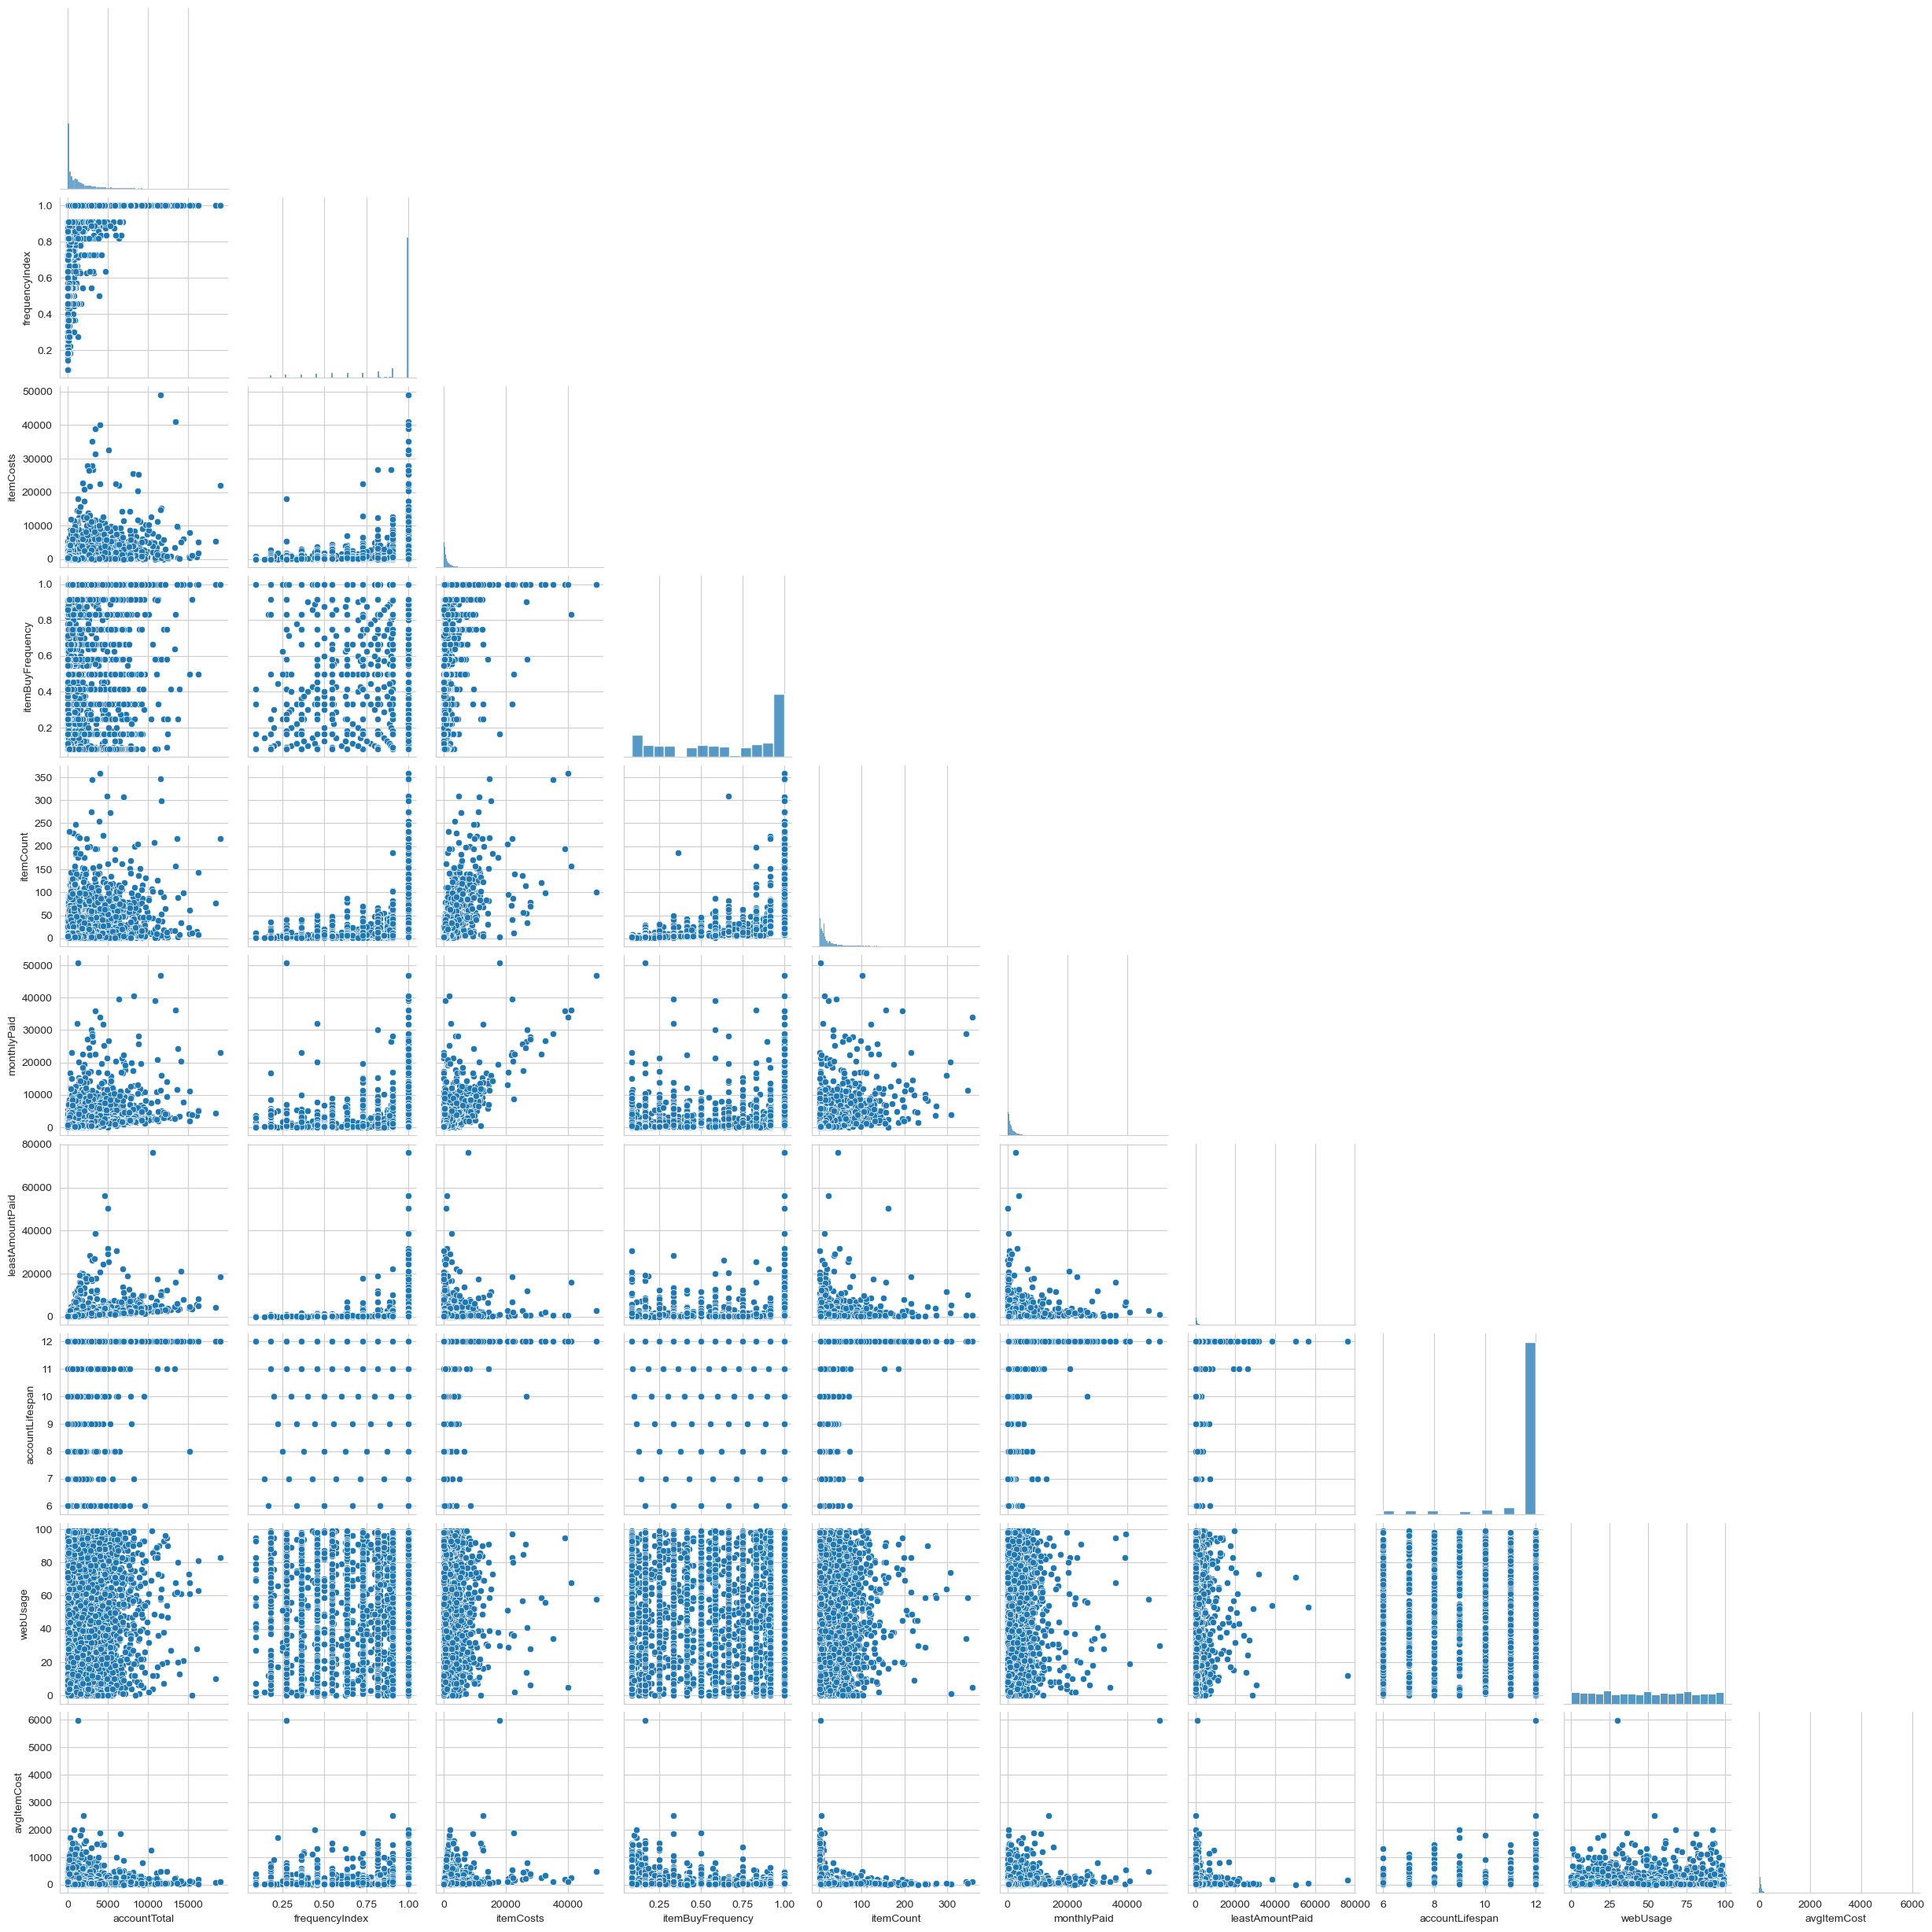

In [15]:
sns.pairplot(df, corner=True)
plt.show()

## Correlation HeatMap

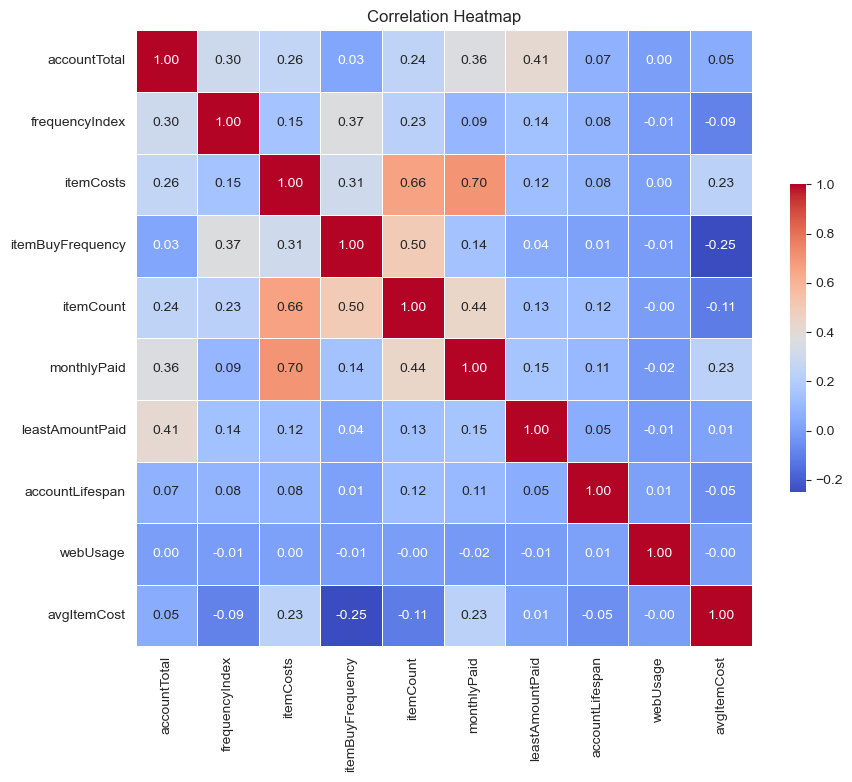

In [16]:
# Select only numerical columns for correlation
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Generate a heatmap in Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title("Correlation Heatmap")
plt.show()


# Preprocessing

### Splitting numerical from categorical variables

In [17]:
# Separate the categorical and numerical columns
categorical_cols = ['location', 'accountType']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

### Encoding categorical variables

We chose to go with the pandas get_dummies function, since boolean values get counted as 0 and 1.

In [18]:
df_dummies = pd.get_dummies(df[categorical_cols])
print(df_dummies)

      location_Chicago  location_Los Angeles  location_New York  \
0                False                 False               True   
2                False                 False               True   
4                False                 False               True   
5                False                 False               True   
6                False                 False               True   
...                ...                   ...                ...   
8944              True                 False              False   
8945              True                 False              False   
8946             False                 False               True   
8948             False                  True              False   
8949              True                 False              False   

      accountType_Premium  accountType_Regular  accountType_Student  
0                    True                False                False  
2                   False                False         

### Scaling the data for visualisation

Due to the high amount of data points in our dataset, and some extreme outliers, we've chosen to scale our data earlier to better visualise the distribution in a graph

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

df_scaled.head()

accountTotal  frequencyIndex  itemCosts  itemBuyFrequency  itemCount  \
0     -0.189423       -0.288479  -0.008712         -0.421204  -0.423640   
1     -0.645764       -0.361142  -0.416941         -1.652808  -0.681784   
2     -0.684392       -1.887126  -0.533420         -1.406485  -0.681784   
3     -0.460063        0.510847  -0.112352         -1.406485  -0.571150   
4     -0.431817       -0.797137   0.558350          0.071439  -0.239251   

   monthlyPaid  leastAmountPaid  accountLifespan  webUsage  avgItemCost  
0    -0.532846        -0.268502        -4.479958  0.371273     0.421337  
1    -0.533694        -0.307591         0.332513 -0.982156     1.456126  
2    -0.573120        -0.335111        -4.479958  0.336570    -0.222406  
3    -0.217659        -0.267826         0.332513  0.232460     1.036191  
4    -0.296377        -0.271718         0.332513 -0.322793     0.669843

In [20]:
print(df_scaled.shape)
print(df_dummies.shape)

(6660, 10)
(6660, 6)


### Putting the variables back together

In [21]:
# Reseting the indices of both DataFrames before concatenation to avoid introducing NaN's
df_scaled_reset = df_scaled.reset_index(drop=True)
df_dummies_reset = df_dummies.reset_index(drop=True)

# Concatenating the dummy variables with the scaled numerical data
df_final = pd.concat([df_scaled_reset, df_dummies_reset], axis=1)

# Checking for NaNs in the final DataFrame
nan_counts = df_final.isna().sum()
print(nan_counts)

accountTotal            0
frequencyIndex          0
itemCosts               0
itemBuyFrequency        0
itemCount               0
monthlyPaid             0
leastAmountPaid         0
accountLifespan         0
webUsage                0
avgItemCost             0
location_Chicago        0
location_Los Angeles    0
location_New York       0
accountType_Premium     0
accountType_Regular     0
accountType_Student     0
dtype: int64


### Type of problem & concerns with data distribution

Identifying the buying behaviour of customers through segmentation is a clustering problem, as we are trying to determine both the suitable segments as well as the appropriate segment identity of the customers in question in regards to these clusters.

To analyse the buying behaviour, we are specifically interested in the variables **'monthlyPaid'** and **'avgItemCost'**. However, these include extreme outliers, as can be seen both in the outlier plots earlier in our EDA, as well as in the difference between the 75% and max columns in the .describe() method used above.

In order to better analyse the relationship of the larger customer group, we are considering to cut out customers where these values are above 2 standard deviations in either or both of these values. Customers who end up in these extreme localities will instead be offered special services from a Customer Relations manager on an individual basis because it is difficult to generalize from outliers and their existence could seriously hamper the functionality of algorithms used to analyse the dataset.

**We continue with analysing the impact this would have on our dataset**

In [22]:
# Create conditions for values greater than 5
condition = (df_final['monthlyPaid'] > 3) | (df_final['avgItemCost'] > 3)

# Count the number of rows satisfying either condition
count = condition.sum()

print(f"Number of rows with 'monthlyPaid' or 'avgItemCost' greater than 3: {count}")

Number of rows with 'monthlyPaid' or 'avgItemCost' greater than 3: 221


**Due to the relativel small amount (221) of customers that this affects, we chose to proceed with the intended cut-off. This elmininates ~3.3% of customers from our investigation**

In [23]:
df_filtered = df_final[~condition]

# Re-checking the distributions after filtering
df_filtered.describe().T

count      mean       std       min       25%       50%  \
accountTotal      6439.0 -0.031741  0.951643 -0.693215 -0.648580 -0.391340   
frequencyIndex    6439.0  0.002061  0.998723 -3.849104  0.074852  0.510847   
itemCosts         6439.0 -0.074609  0.633140 -0.557321 -0.454330 -0.311728   
itemBuyFrequency  6439.0  0.014967  0.989610 -1.652808 -0.913846  0.317758   
itemCount         6439.0 -0.028792  0.888039 -0.681784 -0.534273 -0.276129   
monthlyPaid       6439.0 -0.099126  0.574495 -0.613413 -0.470221 -0.304516   
leastAmountPaid   6439.0 -0.013560  0.983598 -0.358693 -0.288526 -0.255290   
accountLifespan   6439.0  0.002165  0.997620 -4.479958  0.332513  0.332513   
webUsage          6439.0  0.001874  0.999607 -1.710925 -0.878046  0.024240   
avgItemCost       6439.0 -0.106495  0.447490 -0.566839 -0.368504 -0.238120   

                       75%        max  
accountTotal      0.152548   8.312549  
frequencyIndex    0.510847   0.510847  
itemCosts         0.046596   5.453812  
itemBuyFrequency  1.056720   1.056720  
itemCount         0.129526  10.676550  
monthlyPaid       0.035794   2.947086  
leastAmountPaid  -0.034838  32.933788  
accountLifespan   0.332513   0.332513  
webUsage          0.857120   1.724702  
avgItemCost      -0.021671   2.998915

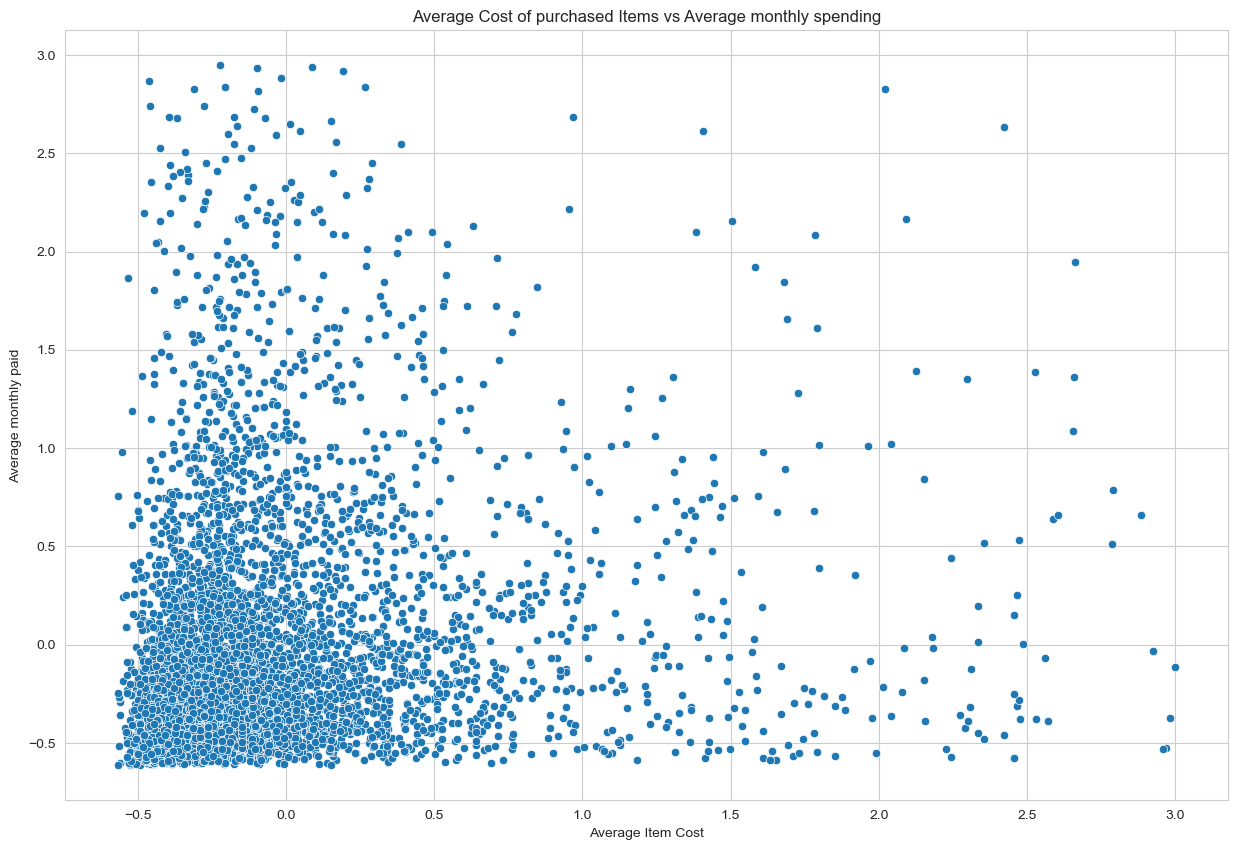

In [24]:
plt.figure(figsize=(15, 10)) 
sns.scatterplot(data=df_filtered, x='avgItemCost', y='monthlyPaid')
plt.title('Average Cost of purchased Items vs Average monthly spending')
plt.xlabel('Average Item Cost')
plt.ylabel('Average monthly paid')
plt.show()

### Some Conclusions

We are left with a much more managable dataset that is starting to show some patterns. Just from looking at it, we can see that while the majority of customers are centered around the mean 0 (as expected), there seems to be a considerable distinction between customers who have high monthly spending because of expensive items, and customers who buy expensive items but a lot less frequently.

# Doing ML & AI Stuff

### Dropping excess variables that are not avgItemCost or monthlyPaid

In [25]:
col_to_keep = ['avgItemCost', 'monthlyPaid']
df_cluster = df_filtered[col_to_keep]

X_cluster = df_cluster.to_numpy()

## KMeans Clustering

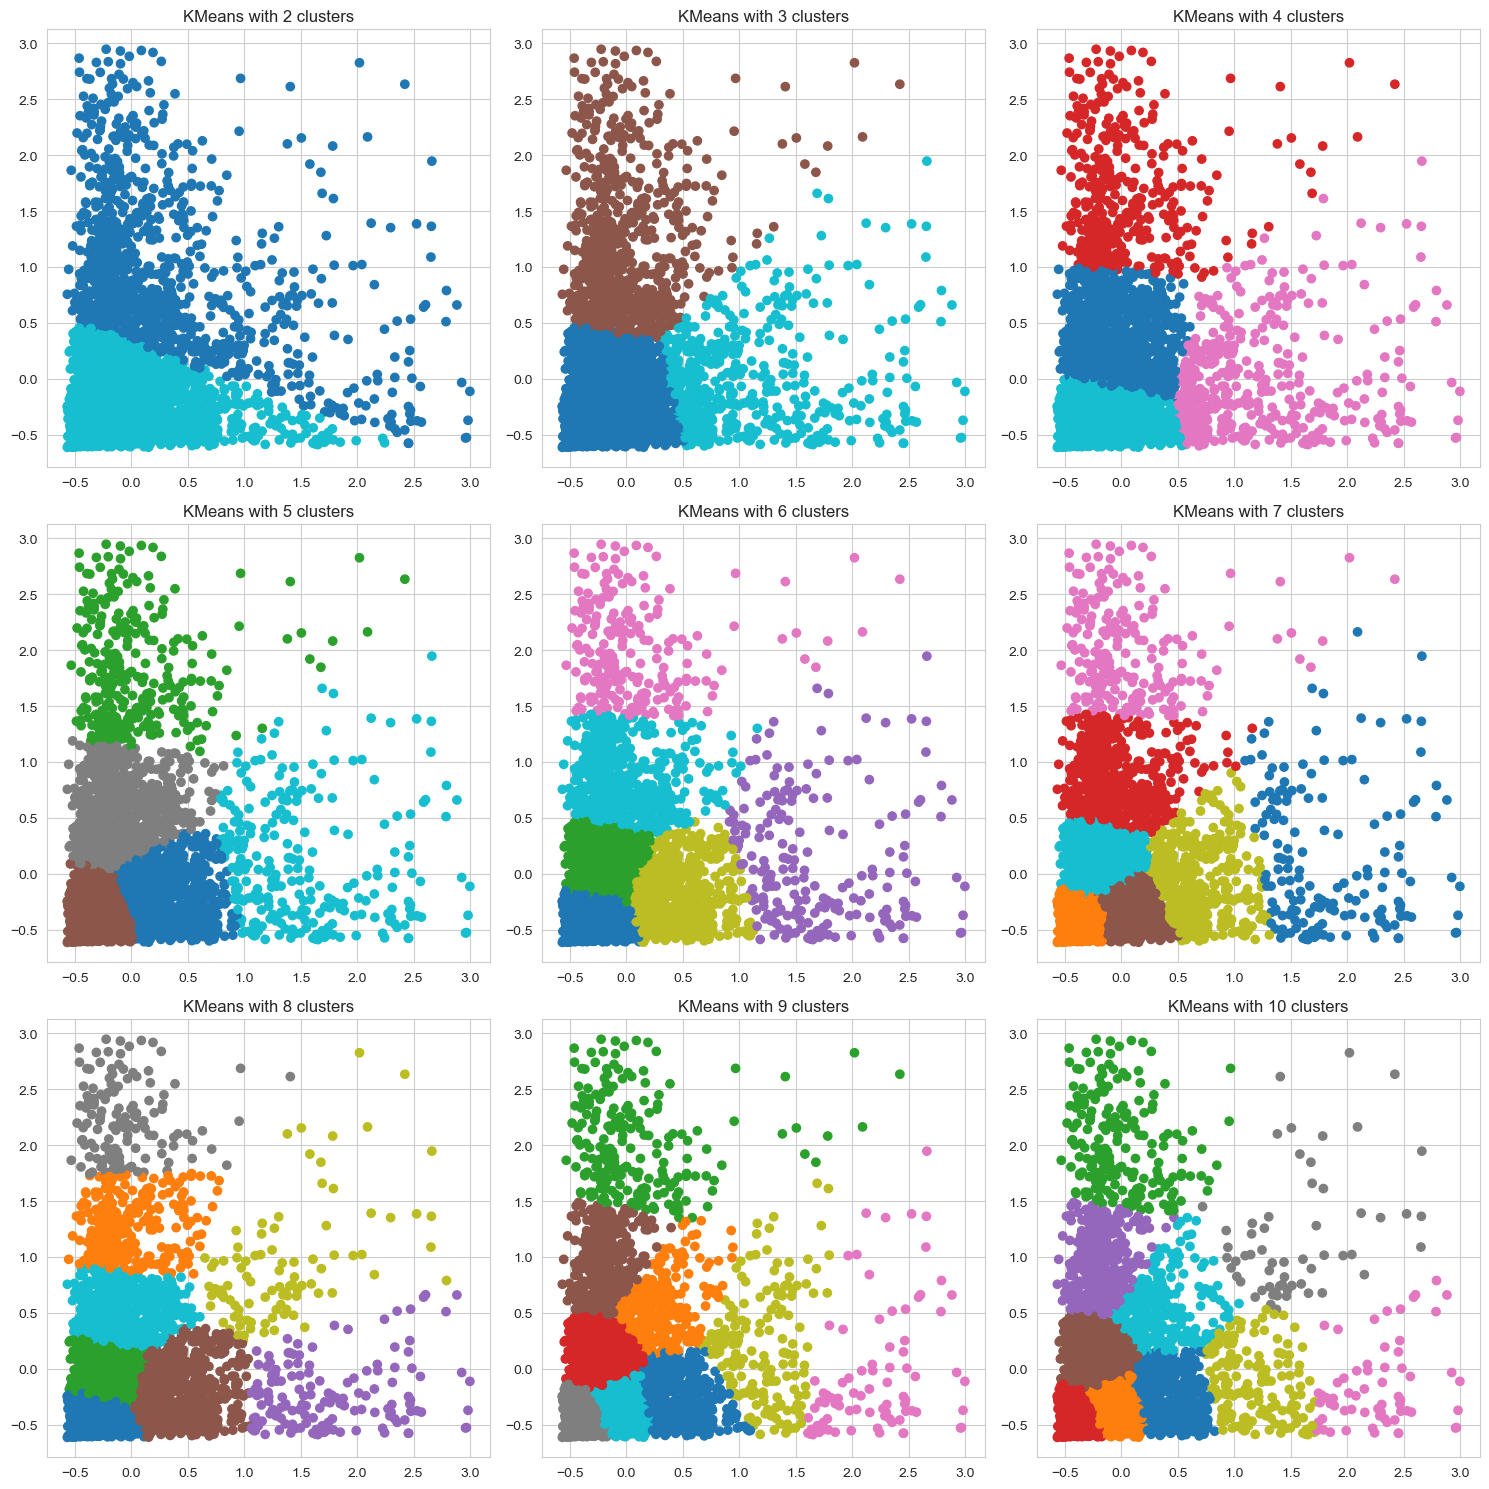

In [26]:
from sklearn.cluster import KMeans

# Number of clusters to try
cluster_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Set up a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15)) # Adjust the size as needed
axs = axs.flatten() # Flatten to 1D array for easy iteration

sum_of_squared_distances = []

# Iterate over the different numbers of clusters
for i, n_clusters in enumerate(cluster_counts):
    # Apply KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', init='k-means++')
    y = kmeans.fit_predict(X_cluster)

    sum_of_squared_distances.append(kmeans.inertia_)

    # Scatter plot the clusters
    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'KMeans with {n_clusters} clusters')

# Adjust layout for better display
plt.tight_layout()
plt.show()

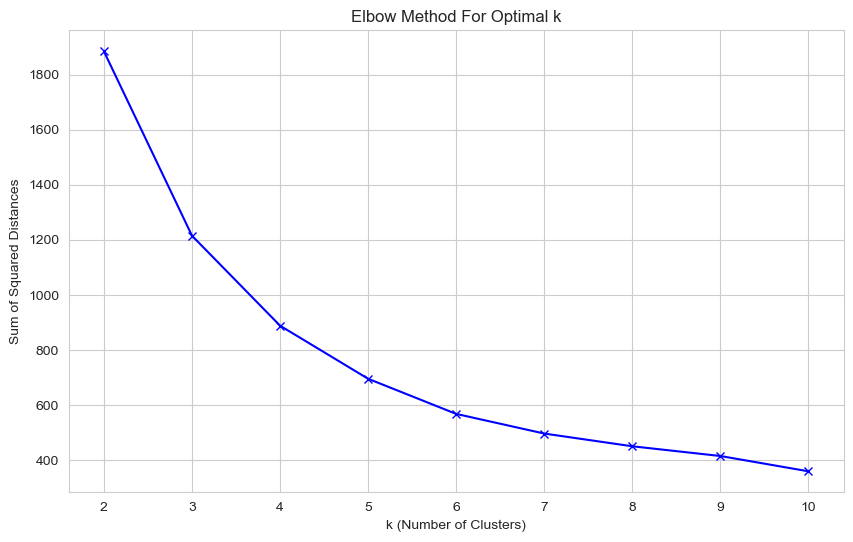

In [27]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

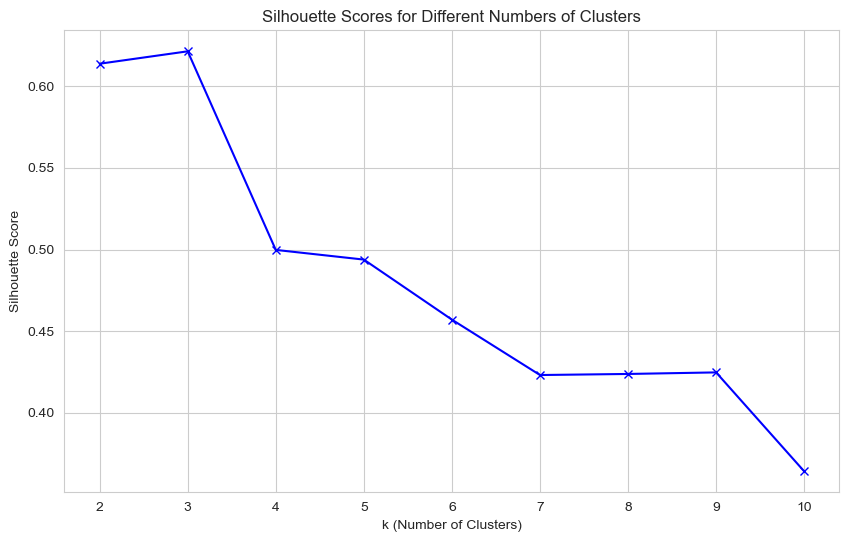

In [28]:
from sklearn.metrics import silhouette_score

# Range of k values to try
k_values = range(2, 11)  # For example, from 2 to 10

# List to store the silhouette scores for each k
kmeans_silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', init='k-means++')
    cluster_labels = kmeans.fit_predict(X_cluster)

    # Compute the silhouette score and store it
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, kmeans_silhouette_scores, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

## DBSCAN Clustering

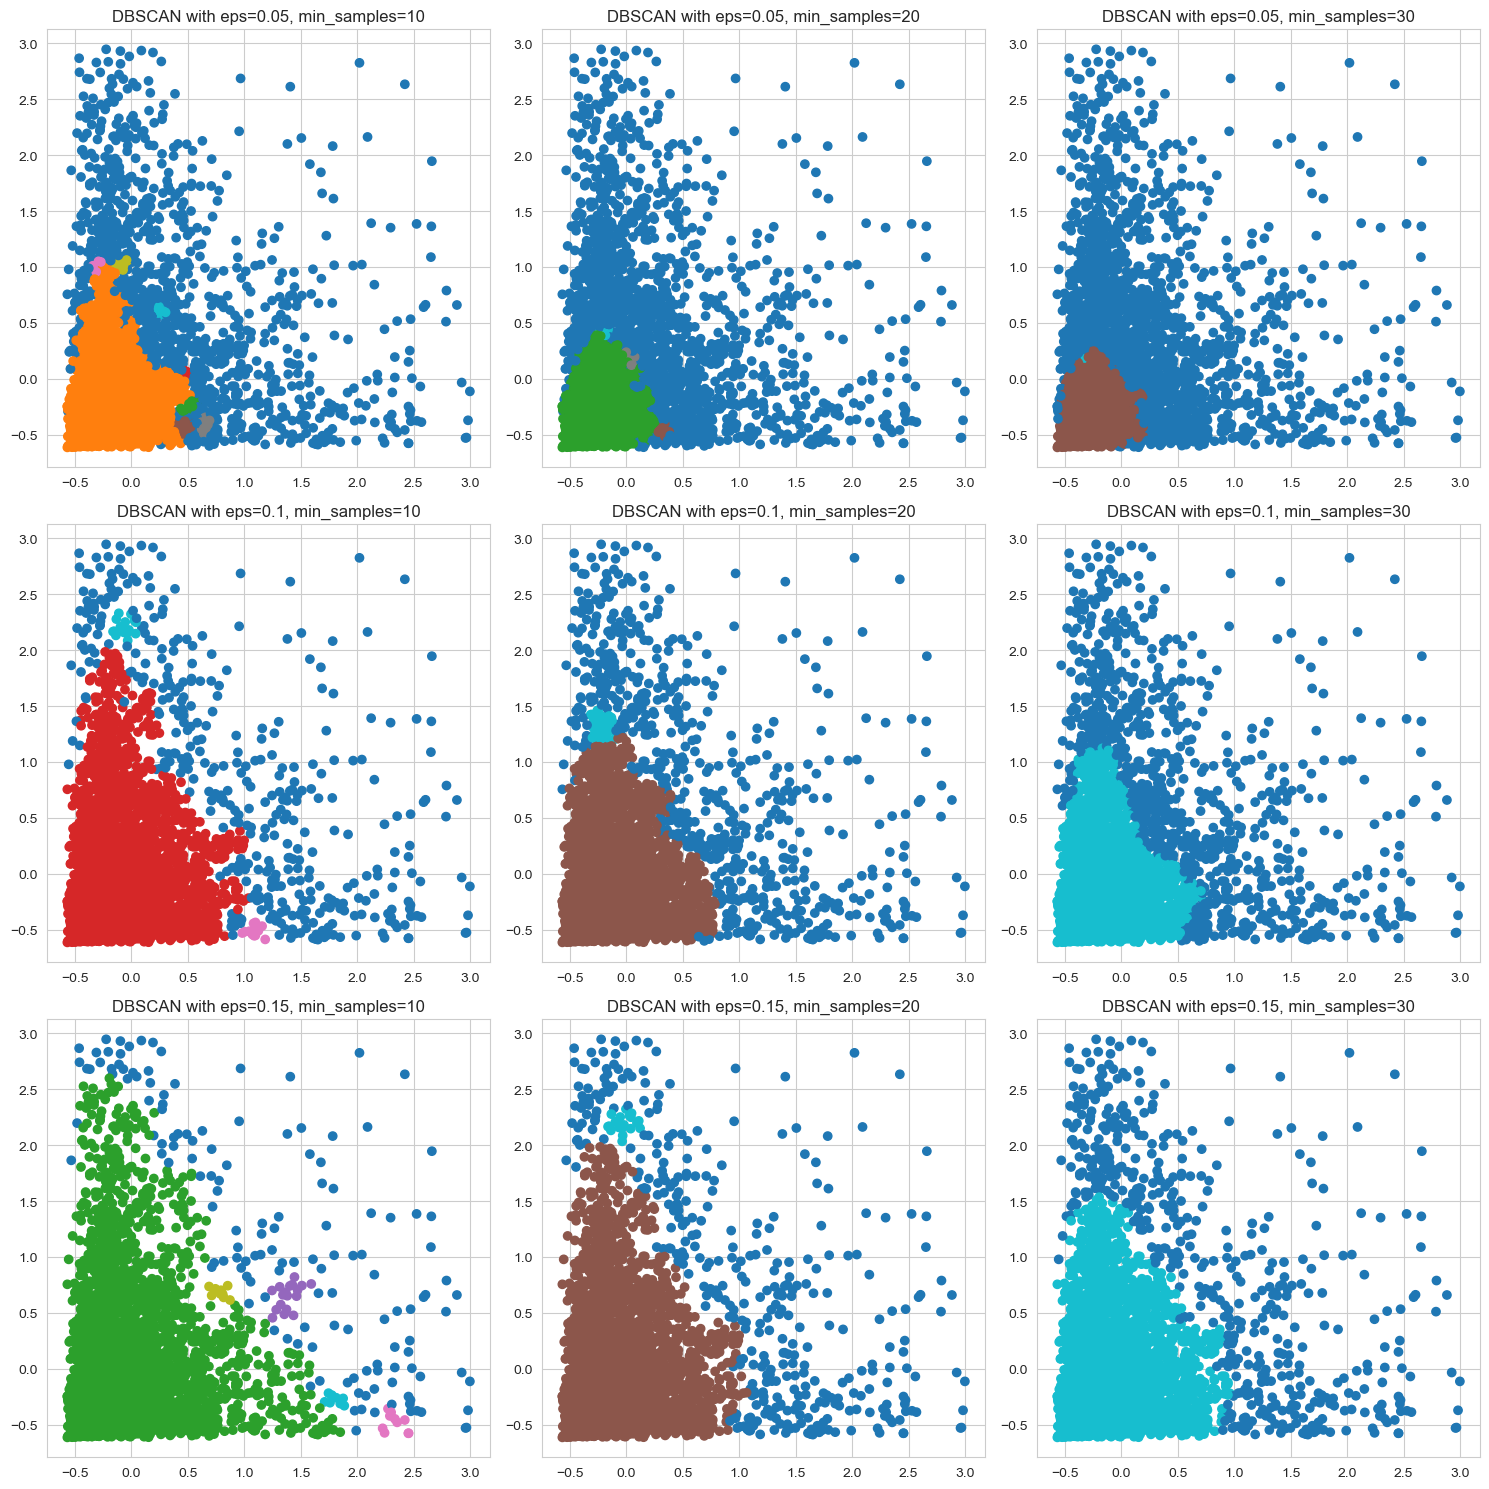

In [29]:
from sklearn.cluster import DBSCAN

# Define combinations of eps and min_samples
dbscan_params = [
    (0.05, 10), (0.05, 20), (0.05, 30),
    (0.1, 10), (0.1, 20), (0.1, 30),
    (0.15, 10), (0.15, 20), (0.15, 30)
]

# Prepare for silhouette score calculation
dbscan_silhouette_scores = []
param_labels = []


# Set up a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

# Iterate over the different parameter combinations
for i, (eps, min_samples) in enumerate(dbscan_params):
    # Apply DBSCAN with the current parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y = dbscan.fit_predict(X_cluster)

    # Check if there are at least two non-noise clusters
    labels = np.unique(y[y != -1])
    if len(labels) > 1:
        # Calculate silhouette score excluding noise points
        score = silhouette_score(X_cluster[y != -1], y[y != -1])
        dbscan_silhouette_scores.append(score)
    else:
        # Indicate no valid clusters or only one cluster
        dbscan_silhouette_scores.append(None)

    param_labels.append(f'eps={eps}, min_samples={min_samples}')

    # Scatter plot the clusters
    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'DBSCAN with eps={eps}, min_samples={min_samples}')


# Adjust layout for better display
plt.tight_layout()
plt.show()

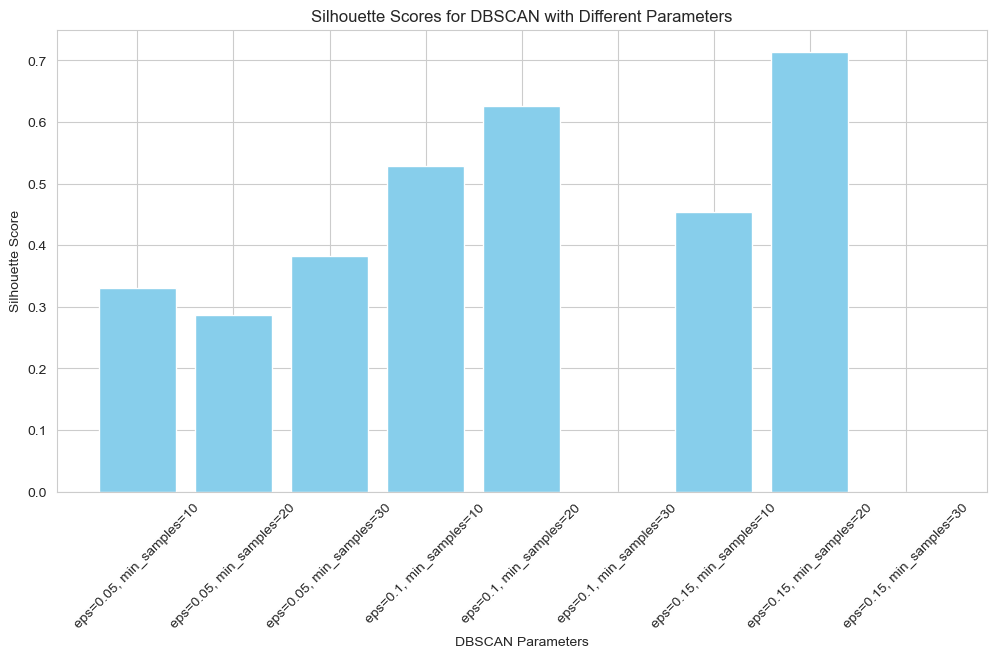

In [30]:
# Replace None values with 0
silhouette_scores = [score if score is not None else 0 for score in dbscan_silhouette_scores]

# Plotting the silhouette scores
plt.figure(figsize=(12, 6))
plt.bar(param_labels, silhouette_scores, color='skyblue')
plt.xlabel('DBSCAN Parameters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for DBSCAN with Different Parameters')
plt.xticks(rotation=45)
plt.show()

If you still have negative values in your silhouette scores graph after replacing None with 0, it indicates that the silhouette scores themselves are negative for some DBSCAN configurations. This is possible and can happen when the cluster cohesion is poor or the separation between clusters is not clear.

Negative silhouette scores suggest that, for those parameter settings, the data points might have been assigned to the wrong clusters, or the clusters are not well-separated. This is a useful indication that those particular parameter combinations for DBSCAN are not suitable for your dataset.

## Hierarchical Clustering

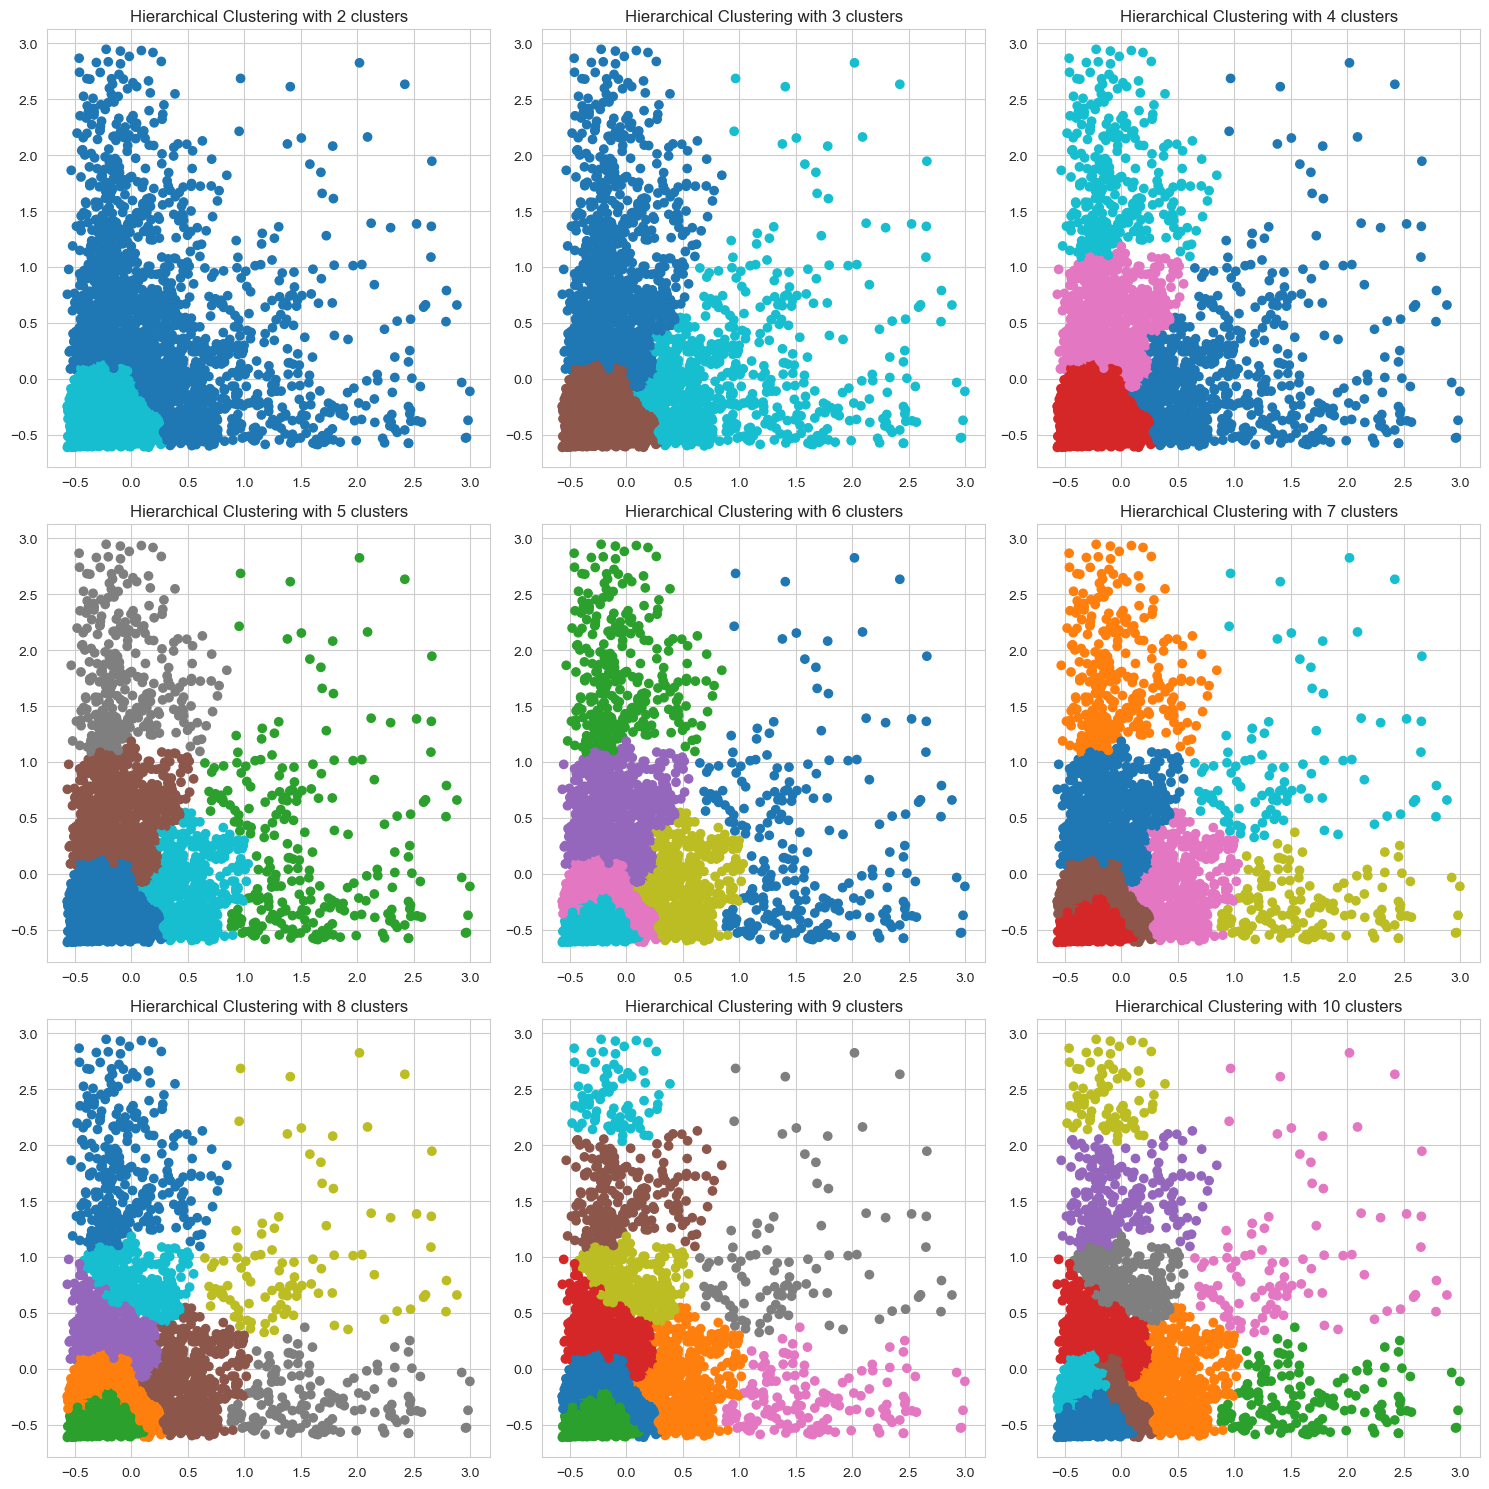

In [31]:
from sklearn.cluster import AgglomerativeClustering

# Number of clusters to try
cluster_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Set up a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the size as needed
axs = axs.flatten()  # Flatten to 1D array for easy iteration

# List to store the silhouette scores for each number of clusters
hierarchical_silhouette_scores = []

# Iterate over the different numbers of clusters
for i, n_clusters in enumerate(cluster_counts):
    # Apply hierarchical clustering with the current number of clusters
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    y = clustering.fit_predict(X_cluster)

    # Compute the silhouette score and store it
    score = silhouette_score(X_cluster, y)
    hierarchical_silhouette_scores.append(score)

    # Scatter plot the clusters
    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'Hierarchical Clustering with {n_clusters} clusters')

# Adjust layout for better display
plt.tight_layout()
plt.show()


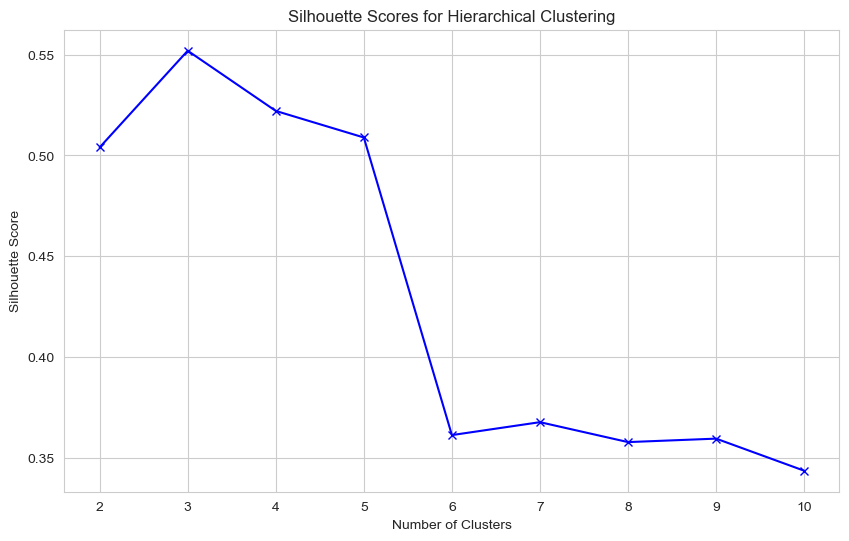

In [32]:
# Now, plot the silhouette scores in a new cell
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, hierarchical_silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Hierarchical Clustering')
plt.show()

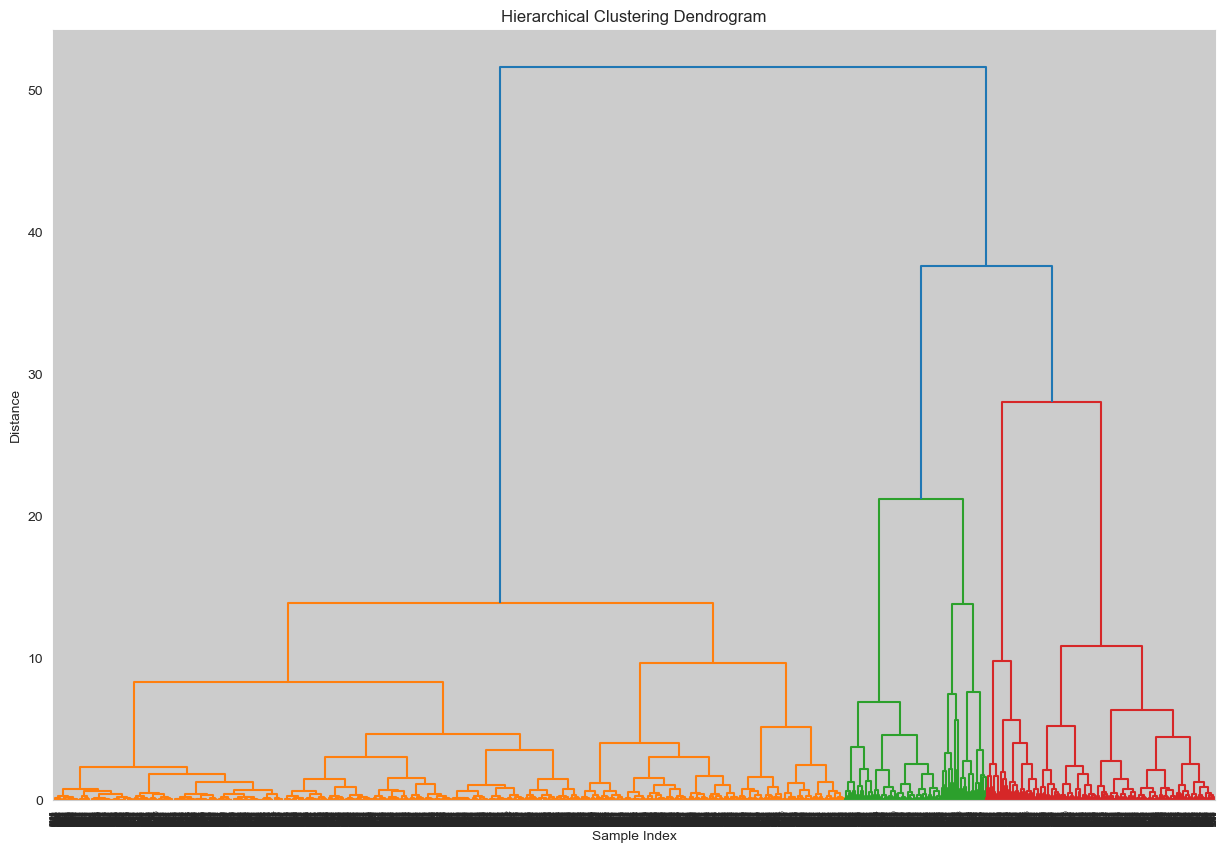

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(X_cluster, method='ward')

# Create a dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

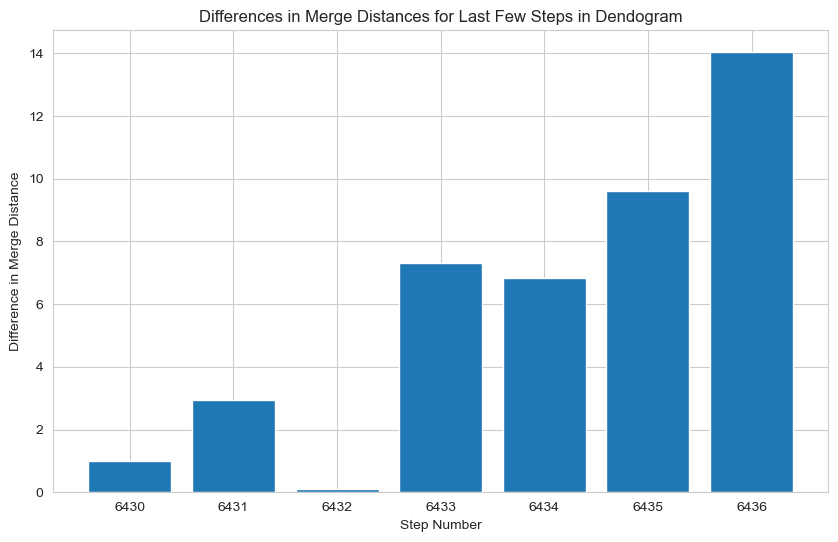

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_cluster, method='ward')

# Number of steps to consider
num_steps_to_consider = 8  # Adjust this number as needed

# Ensure num_steps_to_consider is not larger than the length of Z
num_steps_to_consider = min(num_steps_to_consider, len(Z) - 1)

# Calculate the difference in distance between successive merges for the last few steps
distance_diff = np.diff(Z[-num_steps_to_consider:, 2])

# Create a bar chart for these differences in the last few merges
plt.figure(figsize=(10, 6))
plt.bar(range(len(Z) - num_steps_to_consider, len(Z) - 1), distance_diff)
plt.title('Differences in Merge Distances for Last Few Steps in Dendogram')
plt.xlabel('Step Number')
plt.ylabel('Difference in Merge Distance')
plt.show()


Explanation here about the chart above

## Gaussian Mixture

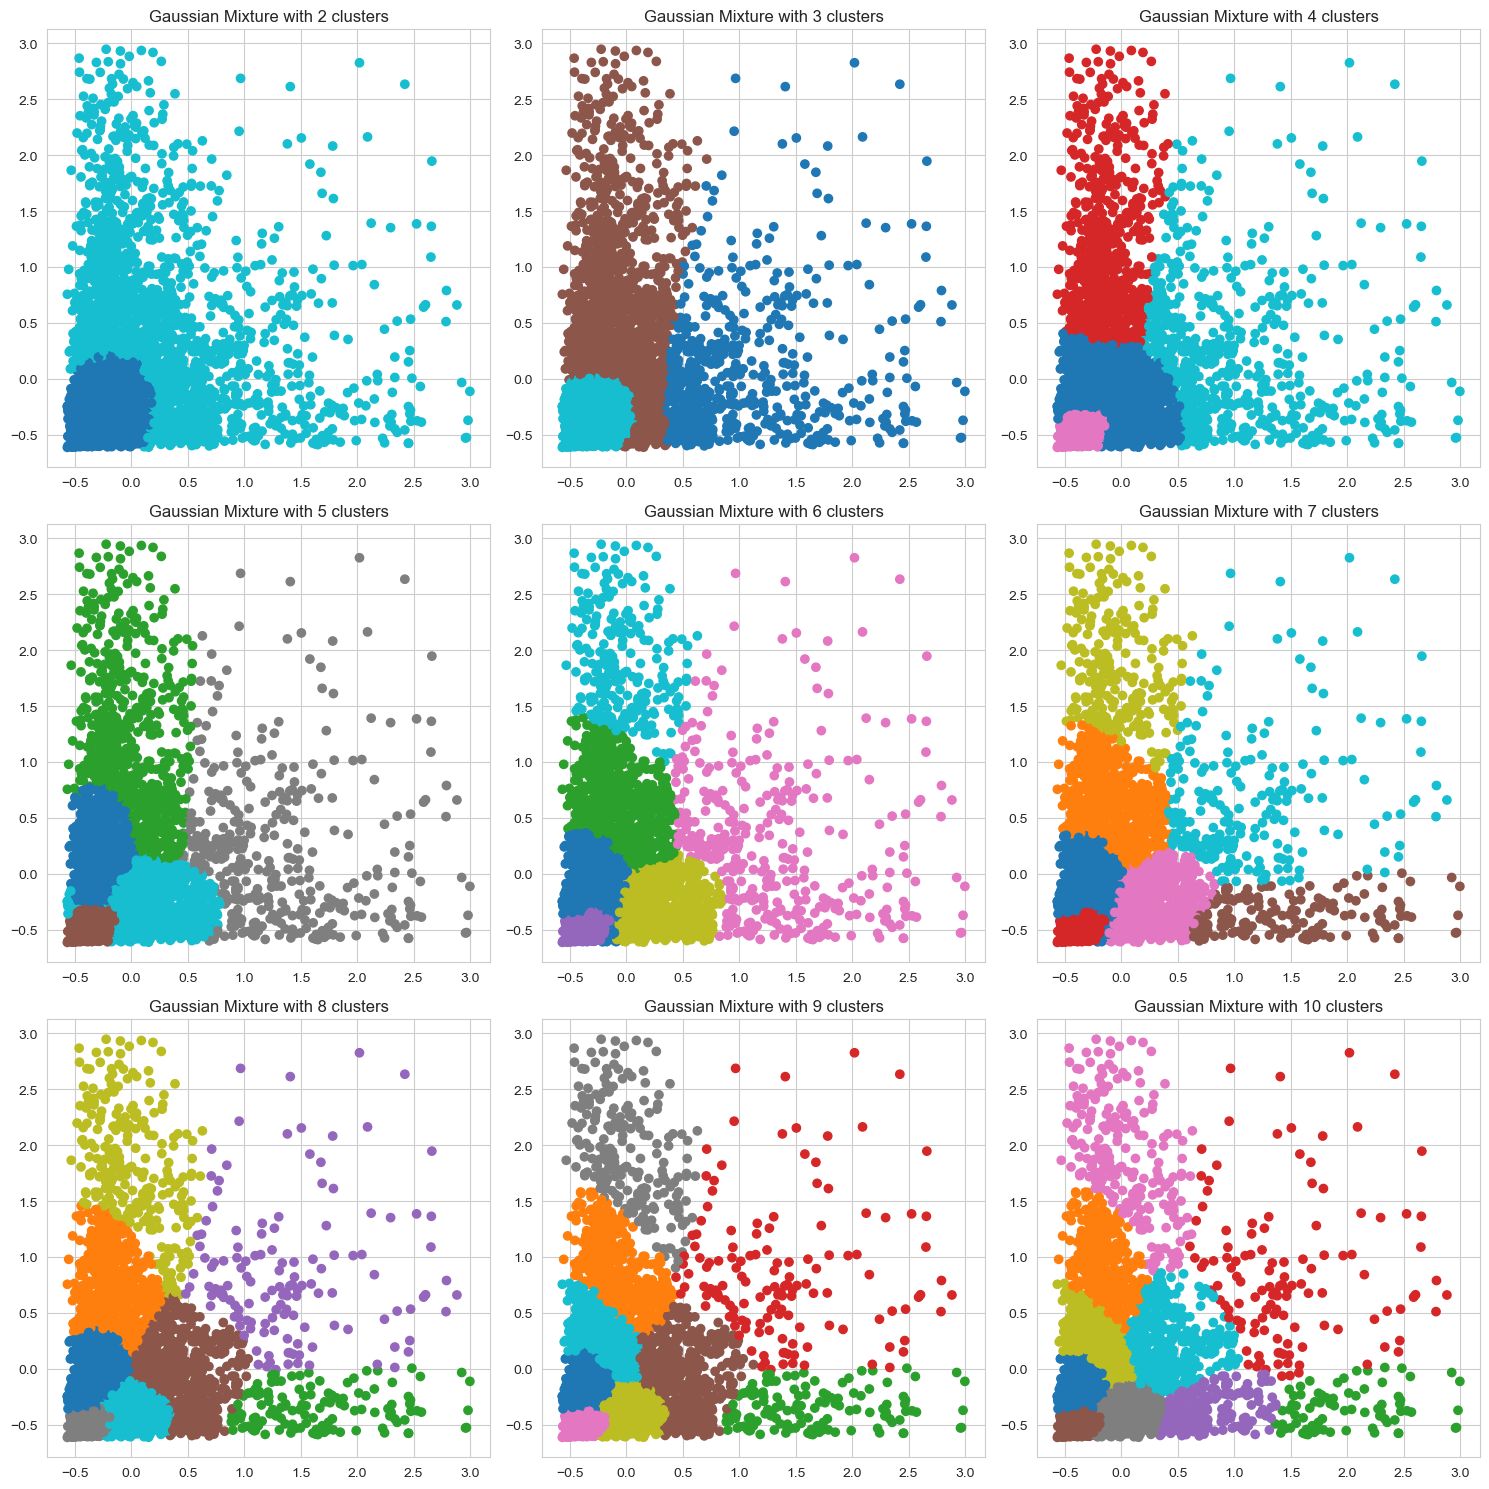

In [35]:
from sklearn.mixture import GaussianMixture

# Number of clusters to try
cluster_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Set up a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the size as needed
axs = axs.flatten()  # Flatten to 1D array for easy iteration

# List to store the silhouette scores for each number of clusters
gaussian_silhouette_scores = []

# Iterate over the different numbers of clusters
for i, n_clusters in enumerate(cluster_counts):
    # Apply Gaussian Mixture Model with the current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(X_cluster)
    y = gmm.predict(X_cluster)

    # Compute the silhouette score and store it
    score = silhouette_score(X_cluster, y)
    gaussian_silhouette_scores.append(score)

    # Scatter plot the clusters
    axs[i].scatter(X_cluster[:, 0], X_cluster[:, 1], c=y, cmap='tab10')
    axs[i].set_title(f'Gaussian Mixture with {n_clusters} clusters')

# Adjust layout for better display
plt.tight_layout()
plt.show()


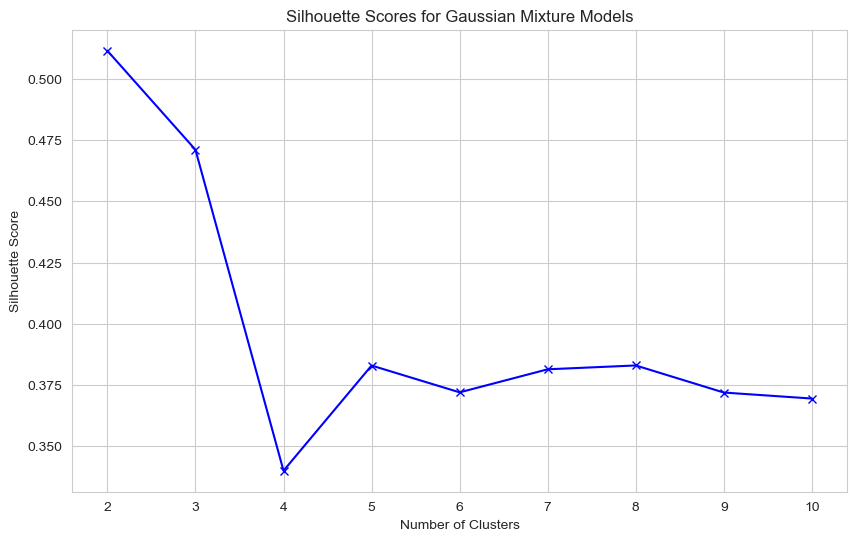

In [36]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, gaussian_silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Gaussian Mixture Models')
plt.xticks(cluster_counts)
plt.show()

# Comparing Models

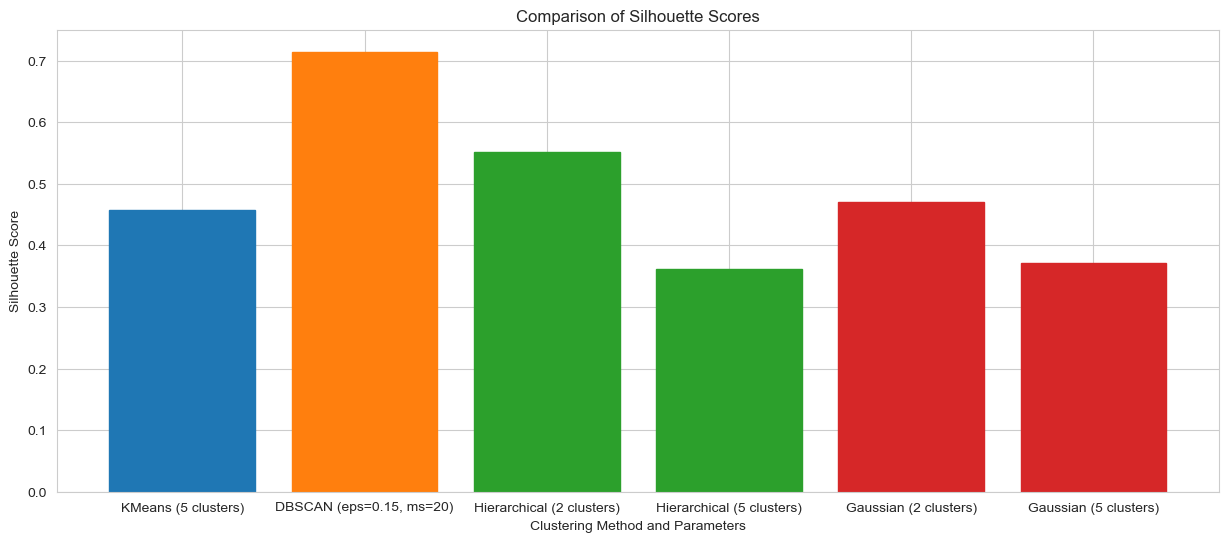

In [37]:
import matplotlib.pyplot as plt

# Example: Selecting specific scores from each method
# Replace these indices with the ones that correspond to your specific parameters
kmeans_specific_score = kmeans_silhouette_scores[4]  # e.g., score for 5 clusters
dbscan_specific_score = dbscan_silhouette_scores[7]  # e.g., score for eps=0.15, min_samples=20
hierarchical_specific_score1 = hierarchical_silhouette_scores[1]  # e.g., score for 2 clusters
hierarchical_specific_score2 = hierarchical_silhouette_scores[4]  # e.g., score for 5 clusters
gaussian_specific_score1 = gaussian_silhouette_scores[1]  # e.g., score for 2 clusters
gaussian_specific_score2 = gaussian_silhouette_scores[4]  # e.g., score for 5 clusters

# Prepare data for plotting
methods = ['KMeans (5 clusters)', 'DBSCAN (eps=0.15, ms=20)', 'Hierarchical (2 clusters)', 'Hierarchical (5 clusters)', 'Gaussian (2 clusters)', 'Gaussian (5 clusters)']
scores = [kmeans_specific_score, dbscan_specific_score, hierarchical_specific_score1, hierarchical_specific_score2, gaussian_specific_score1, gaussian_specific_score2]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#2ca02c', '#d62728', '#d62728']

# Create a bar chart
plt.figure(figsize=(15, 6))
barlist = plt.bar(methods, scores)
for i, bar in enumerate(barlist):
    bar.set_color(colors[i])
plt.xlabel('Clustering Method and Parameters')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')
plt.show()


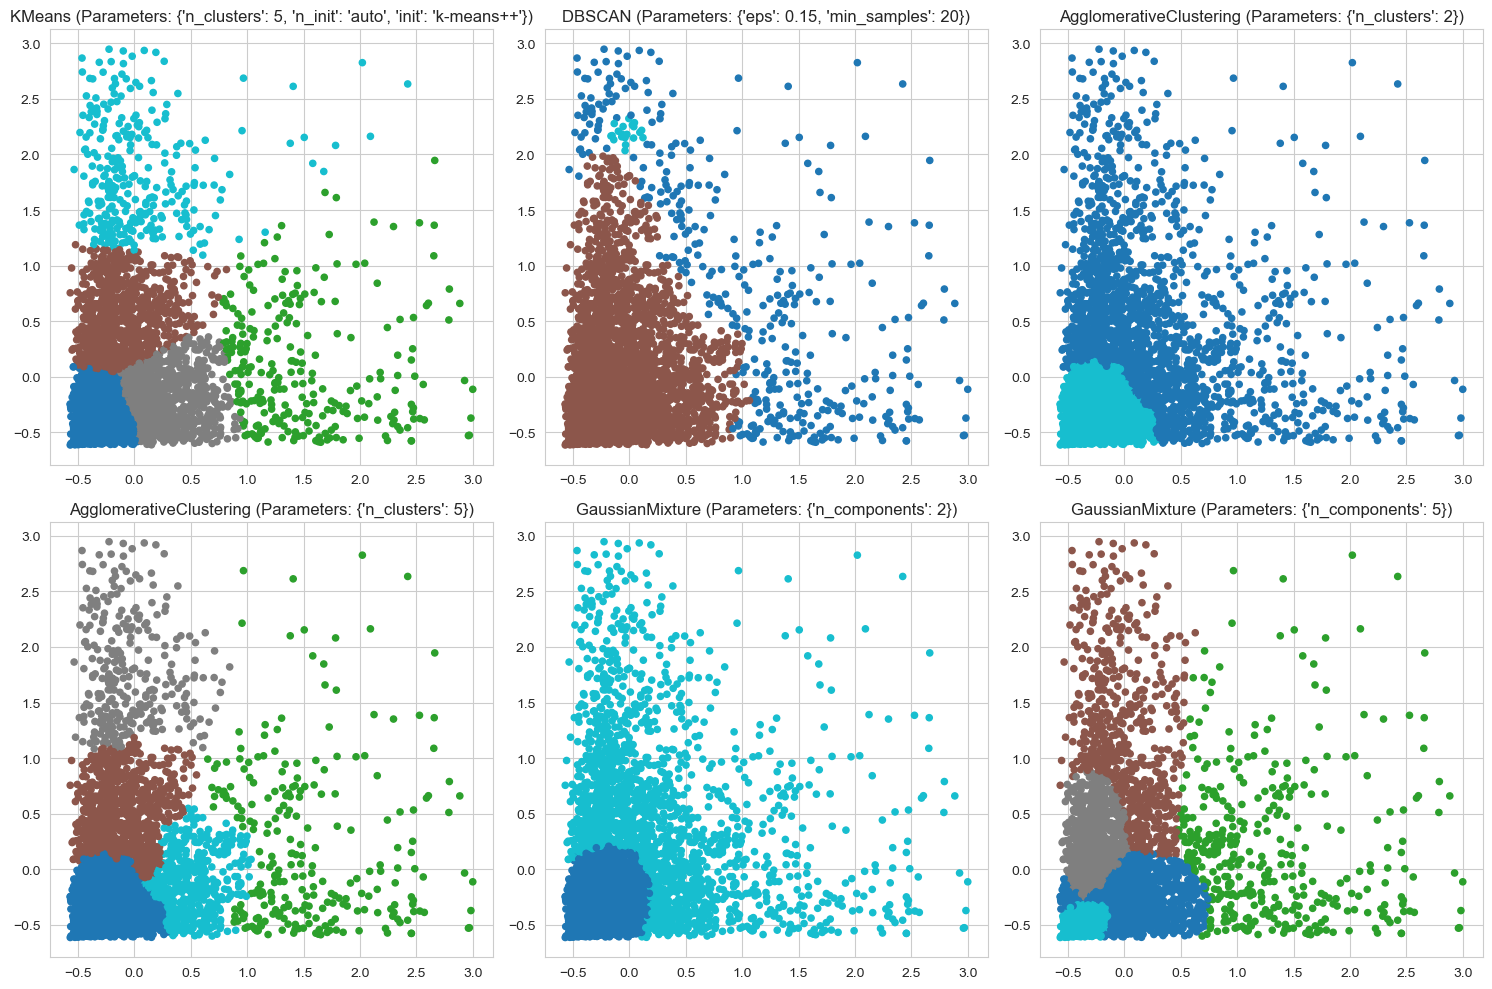

In [38]:
# Ensure X_cluster is a NumPy array
X = X_cluster.to_numpy() if isinstance(X_cluster, pd.DataFrame) else X_cluster

# Define clustering methods and parameters
clustering_methods = [
    (KMeans, {'n_clusters': 5, 'n_init': 'auto', 'init': 'k-means++'}),
    (DBSCAN, {'eps': 0.15, 'min_samples': 20}),
    (AgglomerativeClustering, {'n_clusters': 2}),
    (AgglomerativeClustering, {'n_clusters': 5}),
    (GaussianMixture, {'n_components': 2}),
    (GaussianMixture, {'n_components': 5})
]

# Set up a 2x3 grid for subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the size as needed
axs = axs.flatten()  # Flatten to 1D array for easy iteration

# Iterate over the clustering methods and plot
for i, (clustering_method, kwargs) in enumerate(clustering_methods):
    # Apply the clustering method
    method = clustering_method(**kwargs)
    if isinstance(method, GaussianMixture):
        method.fit(X)
        y = method.predict(X)
    else:
        y = method.fit_predict(X)

    # Plot the clusters
    axs[i].scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=20)
    axs[i].set_title(f'{clustering_method.__name__} (Parameters: {kwargs})')

# Adjust layout for better display
plt.tight_layout()
plt.show()

## Clustering Conclusion

Despite high silhuette scores, we have decided to disregard segmentations with fewer than 3 clusters as we don't recognize any semantic meaning in these and they don't reflect our intention of properly creating actionable customer segments that can be used targeted advertisement and marketing campaigns. This eliminates:
- DBSCAN
- Gaussian Mixture with n=2
- Agglomerative/Hierarchical Clustering with n=2

leaving us with 3 remaining options:
- KMeans
- Agglomerative/Hierarchical Clustering with n=5
- Gaussian Mixture with n=5

We see issues with Gaussian Mixture n=5 both when it comes to the split cluster around (-0.5,0), and because of the vertical size of the right cluster, stretching from very low to very high monthly paid, essentially not discriminating between largely different customers.

Comparing the last 2 options, we prefer KMeans as it has a more semantically logical divide between spending habits and item cost, as well as a more diagonal split between high spending and high item cost customers.


## Resulting Segments

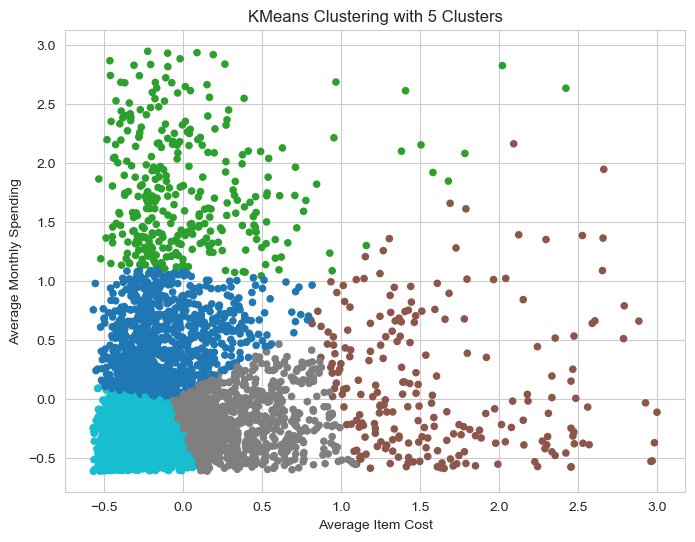

In [39]:
# Ensure X_cluster is a NumPy array
X = X_cluster.to_numpy() if isinstance(X_cluster, pd.DataFrame) else X_cluster

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, n_init='auto', init='k-means++')
y_kmeans = kmeans.fit_predict(X)

# Create a single plot for KMeans clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='tab10', s=20)
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('Average Item Cost')  # Adjust label according to your dataset
plt.ylabel('Average Monthly Spending')  # Adjust label according to your dataset
plt.show()

### Clusters
1. Budget-Conscious (bottom lower left corner)
2. Regular Buyers (above budget-conscious on the y-axis)
3. Mid-Range Shoppers (middle on the x-axis, ~0.0-1.0)
4. Occasional Splurgers (bottom right on the x-axis)
5. Big Spenders (top left on the y-axis)